#** XỬ LÝ DỮ LIỆU**

In [ ]:
!pip3 install vnstock==0.2.0
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from vnstock import *
list=listing_companies()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
list[list.industry=='Bất động sản']
so_luong_bds=len(list[list.industry=='Bất động sản'].ticker.to_list())
print('Số lượng Doanh nghiệp Bất động sản niêm yết là:',so_luong_bds,'doanh nghiệp')

Số lượng Doanh nghiệp Bất động sản niêm yết là: 124 doanh nghiệp


##**1. Dữ liệu chỉ số tài chính ngành BĐS**

In [ ]:
df=pd.DataFrame()
for i in list[list.industry=='Bất động sản'].ticker.to_list():
  try:
    x=financial_ratio(i,'yearly',True).T.sort_index(ascending=True)
    df=pd.concat([df,x])
  except Exception:
    continue
df.head()

ticker priceToEarning priceToBook valueBeforeEbitda dividend    roe  \
year                                                                       
2015    BCM            NaN         NaN               NaN      NaN   0.05   
2016    BCM            NaN         NaN              36.3      NaN  0.076   
2017    BCM            NaN         NaN              22.6      NaN  0.082   
2018    BCM           11.2         2.0              19.5      NaN  0.197   
2019    BCM           12.2         2.1               NaN      NaN  0.185   

        roa daysReceivable daysInventory daysPayable  ... cashCirculation  \
year                                                  ...                   
2015   0.01            241          1423          99  ...            1565   
2016  0.014            293          1661          57  ...            1897   
2017  0.016            315          2063          81  ...            2297   
2018  0.045            295          2702        -200  ...            3197   
2019  0.056            177          1683          58  ...            1802   

     revenueOnWorkCapital capexOnFixedAsset revenueOnAsset postTaxOnPreTax  \
year                                                                         
2015                  1.5            -0.169            0.1             1.3   
2016                  1.2             -0.32            0.1             1.2   
2017                  1.2            -0.062            0.1             1.3   
2018                  1.2            -0.108            0.1             1.2   
2019                  2.1            -0.089            0.2             1.2   

     ebitOnRevenue preTaxOnEbit payableOnEquity ebitdaOnStockChange  \
year                                                                  
2015         0.087          1.0             3.5               0.293   
2016         0.101          1.2             3.4               0.132   
2017         0.131          1.3             3.7               0.153   
2018         0.313          1.2             2.3               0.483   
2019         0.221          1.6             1.8              -0.208   

     bookValuePerShareChange  
year                          
2015                   0.035  
2016                   0.103  
2017                  -0.113  
2018                   0.273  
2019                   0.187  

[5 rows x 40 columns]

**Chuyển đổi dạng dữ liệu**

In [ ]:
for i in df.drop(columns='ticker').columns.to_list():
  df[i]=df[i].astype(float)

In [ ]:
df.reset_index(inplace=True)
df.rename(columns={'index':'year'},inplace=True)

In [ ]:
df

year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0     2015    BCM             NaN          NaN                NaN       NaN   
1     2016    BCM             NaN          NaN               36.3       NaN   
2     2017    BCM             NaN          NaN               22.6       NaN   
3     2018    BCM            11.2          2.0               19.5       NaN   
4     2019    BCM            12.2          2.1                NaN       NaN   
...    ...    ...             ...          ...                ...       ...   
1451  2020    VRG            64.5          2.6             -325.2     0.015   
1452  2021    VRG           154.4          2.5             -264.2       NaN   
1453  2022    VRG            14.5          2.3                9.3     0.064   
1454  2023    VRG             3.5          1.4                3.0     0.152   
1455  2024    VRG            10.9          1.6                4.7       NaN   

        roe    roa  daysReceivable  daysInventory  ...  cashCirculation  \
0     0.050  0.010           241.0         1423.0  ...           1565.0   
1     0.076  0.014           293.0         1661.0  ...           1897.0   
2     0.082  0.016           315.0         2063.0  ...           2297.0   
3     0.197  0.045           295.0         2702.0  ...           3197.0   
4     0.185  0.056           177.0         1683.0  ...           1802.0   
...     ...    ...             ...            ...  ...              ...   
1451  0.039  0.017          4377.0            NaN  ...              NaN   
1452  0.016  0.007          4409.0            NaN  ...              NaN   
1453  0.169  0.076           634.0            NaN  ...              NaN   
1454  0.480  0.200           215.0            NaN  ...              NaN   
1455  0.136  0.053          1187.0            3.0  ...            340.0   

      revenueOnWorkCapital  capexOnFixedAsset  revenueOnAsset  \
0                      1.5             -0.169             0.1   
1                      1.2             -0.320             0.1   
2                      1.2             -0.062             0.1   
3                      1.2             -0.108             0.1   
4                      2.1             -0.089             0.2   
...                    ...                ...             ...   
1451                   0.1             -0.338             0.0   
1452                   0.1             -0.057             0.0   
1453                   0.6             -0.527             0.2   
1454                   1.7             -1.287             0.5   
1455                   0.3             -0.658             0.1   

      postTaxOnPreTax  ebitOnRevenue  preTaxOnEbit  payableOnEquity  \
0                 1.3          0.087           1.0              3.5   
1                 1.2          0.101           1.2              3.4   
2                 1.3          0.131           1.3              3.7   
3                 1.2          0.313           1.2              2.3   
4                 1.2          0.221           1.6              1.8   
...               ...            ...           ...              ...   
1451              0.8            NaN          -6.4              1.4   
1452              0.8            NaN          -1.6              1.3   
1453              0.8          0.460           1.1              1.2   
1454              0.8          0.434           1.0              1.6   
1455              0.7          0.655           1.1              1.5   

      ebitdaOnStockChange  bookValuePerShareChange  
0                   0.293                    0.035  
1                   0.132                    0.103  
2                   0.153                   -0.113  
3                   0.483                    0.273  
4                  -0.208                    0.187  
...                   ...                      ...  
1451               -1.112                   -0.038  
1452                0.644                   -0.022  
1453              -17.924                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1456 non-null   int64  
 1   ticker                   1456 non-null   object 
 2   priceToEarning           964 non-null    float64
 3   priceToBook              964 non-null    float64
 4   valueBeforeEbitda        1316 non-null   float64
 5   dividend                 422 non-null    float64
 6   roe                      1456 non-null   float64
 7   roa                      1456 non-null   float64
 8   daysReceivable           1427 non-null   float64
 9   daysInventory            1364 non-null   float64
 10  daysPayable              1438 non-null   float64
 11  ebitOnInterest           1218 non-null   float64
 12  earningPerShare          1456 non-null   float64
 13  bookValuePerShare        1456 non-null   float64
 14  equityOnTotalAsset      

##**Tính vòng quay hàng tồn kho BĐS**

In [ ]:
# Tính vòng quay hàng tồn kho ( Inventory Turnover Ratio)
df_itr = pd.DataFrame()
for i in list[list.industry=='Bất động sản'].ticker.to_list():
  try:
    x=financial_ratio(i,'yearly',True).T.sort_index(ascending=True)
    x['year'] = x.index
    x['ticker'] = i
    x['ITR'] = (365 / x['daysInventory']).round(2)
    df_itr = pd.concat([df_itr, x], ignore_index=True)
  except Exception:
    continue
df_itr.head()

ticker priceToEarning priceToBook valueBeforeEbitda dividend    roe    roa  \
0    BCM            NaN         NaN               NaN      NaN   0.05   0.01   
1    BCM            NaN         NaN              36.3      NaN  0.076  0.014   
2    BCM            NaN         NaN              22.6      NaN  0.082  0.016   
3    BCM           11.2         2.0              19.5      NaN  0.197  0.045   
4    BCM           12.2         2.1               NaN      NaN  0.185  0.056   

  daysReceivable daysInventory daysPayable  ... capexOnFixedAsset  \
0            241          1423          99  ...            -0.169   
1            293          1661          57  ...             -0.32   
2            315          2063          81  ...            -0.062   
3            295          2702        -200  ...            -0.108   
4            177          1683          58  ...            -0.089   

  revenueOnAsset postTaxOnPreTax ebitOnRevenue preTaxOnEbit payableOnEquity  \
0            0.1             1.3         0.087          1.0             3.5   
1            0.1             1.2         0.101          1.2             3.4   
2            0.1             1.3         0.131          1.3             3.7   
3            0.1             1.2         0.313          1.2             2.3   
4            0.2             1.2         0.221          1.6             1.8   

  ebitdaOnStockChange bookValuePerShareChange  year       ITR  
0               0.293                   0.035  2015    0.2565  
1               0.132                   0.103  2016  0.219747  
2               0.153                  -0.113  2017  0.176927  
3               0.483                   0.273  2018  0.135085  
4              -0.208                   0.187  2019  0.216875  

[5 rows x 42 columns]

In [ ]:
#Lấy giá trị hàng tồn kho trung bình ngành để so sánh
mean_itr = df_itr.groupby(['ticker', 'year'])['ITR'].mean().reset_index()
industry_mean_itr = df_itr.groupby(['year'])['ITR'].mean().reset_index()
industry_mean_itr.rename(columns={'ITR': 'ITR_nganh'}, inplace=True)
mean_itr = pd.merge(mean_itr, industry_mean_itr, on='year', how='left')
mean_itr

ticker  year        ITR  ITR_nganh
0       AAV  2016   8.902439   4.919829
1       AAV  2017   8.295455   6.609133
2       AAV  2018  15.869565   9.345302
3       AAV  2019      18.25  10.576715
4       AAV  2020  13.518519   8.856316
...     ...   ...        ...        ...
1315    XDH  2020   0.837156   8.856316
1316    XDH  2021   0.844907  12.108209
1317    XDH  2022   1.112805  11.847747
1318    XDH  2023   0.644876  11.312875
1319    XDH  2024   0.445665  18.758788

[1320 rows x 4 columns]

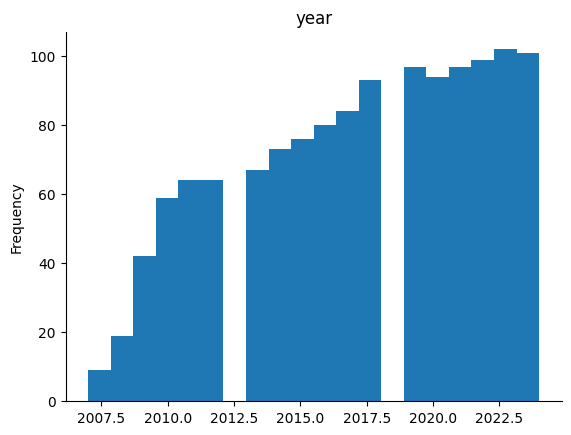

In [ ]:
from matplotlib import pyplot as plt
mean_itr['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#merge df với mean_itr
df=pd.merge(df,mean_itr,on=['year','ticker'],how='left')
df.head()

year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0  2015    BCM             NaN          NaN                NaN       NaN   
1  2016    BCM             NaN          NaN               36.3       NaN   
2  2017    BCM             NaN          NaN               22.6       NaN   
3  2018    BCM            11.2          2.0               19.5       NaN   
4  2019    BCM            12.2          2.1                NaN       NaN   

     roe    roa  daysReceivable  daysInventory  ...  capexOnFixedAsset  \
0  0.050  0.010           241.0         1423.0  ...             -0.169   
1  0.076  0.014           293.0         1661.0  ...             -0.320   
2  0.082  0.016           315.0         2063.0  ...             -0.062   
3  0.197  0.045           295.0         2702.0  ...             -0.108   
4  0.185  0.056           177.0         1683.0  ...             -0.089   

   revenueOnAsset  postTaxOnPreTax  ebitOnRevenue  preTaxOnEbit  \
0             0.1              1.3          0.087           1.0   
1             0.1              1.2          0.101           1.2   
2             0.1              1.3          0.131           1.3   
3             0.1              1.2          0.313           1.2   
4             0.2              1.2          0.221           1.6   

   payableOnEquity  ebitdaOnStockChange  bookValuePerShareChange       ITR  \
0              3.5                0.293                    0.035    0.2565   
1              3.4                0.132                    0.103  0.219747   
2              3.7                0.153                   -0.113  0.176927   
3              2.3                0.483                    0.273  0.135085   
4              1.8               -0.208                    0.187  0.216875   

   ITR_nganh  
0   5.330408  
1   4.919829  
2   6.609133  
3   9.345302  
4  10.576715  

[5 rows x 43 columns]

##**2. Lấy dữ liệu bảng cân đối kế toán**

In [ ]:
df_cđkt=pd.DataFrame()
for i in list[list.industry=='Bất động sản'].ticker.to_list():
  try:
    x=financial_flow(symbol=i, report_type='balancesheet', report_range='yearly')
    df_cđkt=pd.concat([df_cđkt,x])
  except Exception:
    continue
df_cđkt.head()

ticker  shortAsset  cash  shortInvest  shortReceivable  inventory  \
index                                                                     
2024     BCM       31704  2205          300             8064      21055   
2023     BCM       28441  1332           87             7024      19834   
2022     BCM       27849  1071          436             5333      20841   
2021     BCM       29193  2985          214             4988      20931   
2020     BCM       30235  1776           64             4095      24270   

       longAsset  fixedAsset  asset   debt  ...  oweCentralBank  \
index                                       ...                   
2024       27077        1062  58781  38102  ...            None   
2023       24983        1160  53424  33951  ...            None   
2022       20456        1246  48305  30541  ...            None   
2021       19805        1220  48998  31901  ...            None   
2020       18882        1880  49117  32539  ...            None   

       valuablePaper  payableInterest  receivableInterest deposit otherDebt  \
index                                                                         
2024            None             None                None    None      1356   
2023            None             None                None    None       927   
2022            None             None                None    None       817   
2021            None             None                None    None       970   
2020            None             None                None    None      1235   

       fund unDistributedIncome minorShareHolderProfit payable  
index                                                           
2024   None                 0.0                   1090   38102  
2023   None                 0.0                    911   33951  
2022   None                 0.0                   1007   30541  
2021   None                 0.0                   1015   31901  
2020   None                 0.0                   1157   32539  

[5 rows x 35 columns]

**Lấy các chỉ tiêu cần tính toán từ BCĐKT**

In [ ]:
df1=df_cđkt[['ticker','asset','debt','shortAsset','shortDebt']]
df1['Size']=np.log(df1['asset'])
df1['LEV']=df1['debt']/df1['asset']
df1['CUR']=df1['shortAsset']/df1['shortDebt']
df1

ticker  asset   debt  shortAsset  shortDebt       Size       LEV  \
index                                                                    
2024     BCM  58781  38102       31704       8444  10.981574  0.648203   
2023     BCM  53424  33951       28441       9385  10.886015  0.635501   
2022     BCM  48305  30541       27849       4951  10.785290  0.632253   
2021     BCM  48998  31901       29193       4248  10.799535  0.651067   
2020     BCM  49117  32539       30235       6138  10.801960  0.662479   
...      ...    ...    ...         ...        ...        ...       ...   
2011     VRG    278     17          42          0   5.627621  0.061151   
2010     VRG    354     83          47         50   5.869297  0.234463   
2009     VRG    347    110         140         70   5.849325  0.317003   
2008     VRG    216     34          93          0   5.375278  0.157407   
2007     VRG    163     29         132          0   5.093750  0.177914   

            CUR  
index            
2024   3.754619  
2023   3.030474  
2022   5.624924  
2021   6.872175  
2020   4.925872  
...         ...  
2011        inf  
2010   0.940000  
2009   2.000000  
2008        inf  
2007        inf  

[1747 rows x 8 columns]

In [ ]:
# Thêm 1 cột từ index và đặt lại tên cột cho Year
df1.reset_index(inplace=True)
df1.rename(columns={'index':'year'},inplace=True)

In [ ]:
df1.head()

year ticker  asset   debt  shortAsset  shortDebt       Size       LEV  \
0  2024    BCM  58781  38102       31704       8444  10.981574  0.648203   
1  2023    BCM  53424  33951       28441       9385  10.886015  0.635501   
2  2022    BCM  48305  30541       27849       4951  10.785290  0.632253   
3  2021    BCM  48998  31901       29193       4248  10.799535  0.651067   
4  2020    BCM  49117  32539       30235       6138  10.801960  0.662479   

        CUR  
0  3.754619  
1  3.030474  
2  5.624924  
3  6.872175  
4  4.925872

###**Gộp bảng lần 1**

In [ ]:
df1['year']=df1['year'].astype(int)
df_full=pd.merge(df,df1,on=['year','ticker'],how='left')
df_full.head()

year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0  2015    BCM             NaN          NaN                NaN       NaN   
1  2016    BCM             NaN          NaN               36.3       NaN   
2  2017    BCM             NaN          NaN               22.6       NaN   
3  2018    BCM            11.2          2.0               19.5       NaN   
4  2019    BCM            12.2          2.1                NaN       NaN   

     roe    roa  daysReceivable  daysInventory  ...  bookValuePerShareChange  \
0  0.050  0.010           241.0         1423.0  ...                    0.035   
1  0.076  0.014           293.0         1661.0  ...                    0.103   
2  0.082  0.016           315.0         2063.0  ...                   -0.113   
3  0.197  0.045           295.0         2702.0  ...                    0.273   
4  0.185  0.056           177.0         1683.0  ...                    0.187   

        ITR  ITR_nganh  asset   debt  shortAsset  shortDebt       Size  \
0    0.2565   5.330408  51472  40156       33490       7138  10.848793   
1  0.219747   4.919829  57246  44197       37024       7474  10.955113   
2  0.176927   6.609133  51168  40332       37182       8604  10.842870   
3  0.135085   9.345302  45185  31694       30513      10517  10.718520   
4  0.216875  10.576715  43516  27765       27965       9259  10.680884   

        LEV       CUR  
0  0.780152  4.691790  
1  0.772054  4.953706  
2  0.788227  4.321478  
3  0.701427  2.901303  
4  0.638041  3.020305  

[5 rows x 50 columns]

##**3. Lấy dữ liệu bảng kết quả hoạt động kinh doanh**

In [ ]:
df_hđkd=pd.DataFrame()
for i in list[list.industry=='Bất động sản'].ticker.to_list():
  try:
    x=financial_flow(symbol=i, report_type='incomestatement', report_range='yearly')
    df_hđkd=pd.concat([df_hđkd,x])
  except Exception:
    continue
df_hđkd.head()

ticker  revenue  yearRevenueGrowth quarterRevenueGrowth  costOfGoodSold  \
index                                                                           
2024     BCM     5239             -0.335                 None           -1741   
2023     BCM     7883              0.201                 None           -3635   
2022     BCM     6565             -0.060                 None           -3791   
2021     BCM     6982              0.073                 None           -3759   
2020     BCM     6507             -0.208                 None           -3245   

       grossProfit  operationExpense  operationProfit  \
index                                                   
2024          3498             -1714             1785   
2023          4248             -1465             2783   
2022          2774             -1298             1477   
2021          3223             -1221             2002   
2020          3261             -1352             1910   

       yearOperationProfitGrowth quarterOperationProfitGrowth  ...  \
index                                                          ...   
2024                      -0.359                         None  ...   
2023                       0.884                         None  ...   
2022                      -0.262                         None  ...   
2021                       0.048                         None  ...   
2020                       0.054                         None  ...   

       postTaxProfit  shareHolderIncome  yearShareHolderIncomeGrowth  \
index                                                                  
2024            2395               2187                       -0.097   
2023            2280               2423                        0.425   
2022            1724               1700                        0.172   
2021            1504               1451                       -0.308   
2020            2299               2098                       -0.156   

       quarterShareHolderIncomeGrowth  investProfit serviceProfit otherProfit  \
index                                                                           
2024                             None          None          None        None   
2023                             None          None          None        None   
2022                             None          None          None        None   
2021                             None          None          None        None   
2020                             None          None          None        None   

      provisionExpense operationIncome  ebitda  
index                                           
2024              None            None  2047.0  
2023              None            None  3050.0  
2022              None            None  1666.0  
2021              None            None  2188.0  
2020              None            None  2148.0  

[5 rows x 22 columns]

In [ ]:
df_hđkd.reset_index(inplace=True)
df_hđkd.rename(columns={'index':'year'},inplace=True)
df_hđkd.head()

year ticker  revenue  yearRevenueGrowth quarterRevenueGrowth  \
0  2024    BCM     5239             -0.335                 None   
1  2023    BCM     7883              0.201                 None   
2  2022    BCM     6565             -0.060                 None   
3  2021    BCM     6982              0.073                 None   
4  2020    BCM     6507             -0.208                 None   

   costOfGoodSold  grossProfit  operationExpense  operationProfit  \
0           -1741         3498             -1714             1785   
1           -3635         4248             -1465             2783   
2           -3791         2774             -1298             1477   
3           -3759         3223             -1221             2002   
4           -3245         3261             -1352             1910   

   yearOperationProfitGrowth  ... postTaxProfit  shareHolderIncome  \
0                     -0.359  ...          2395               2187   
1                      0.884  ...          2280               2423   
2                     -0.262  ...          1724               1700   
3                      0.048  ...          1504               1451   
4                      0.054  ...          2299               2098   

   yearShareHolderIncomeGrowth  quarterShareHolderIncomeGrowth  investProfit  \
0                       -0.097                            None          None   
1                        0.425                            None          None   
2                        0.172                            None          None   
3                       -0.308                            None          None   
4                       -0.156                            None          None   

   serviceProfit otherProfit provisionExpense operationIncome  ebitda  
0           None        None             None            None  2047.0  
1           None        None             None            None  3050.0  
2           None        None             None            None  1666.0  
3           None        None             None            None  2188.0  
4           None        None             None            None  2148.0  

[5 rows x 23 columns]

###**Tính tăng trưởng doanh thu qua từng năm**

In [ ]:
income=pd.DataFrame()
for i in list[list.industry=='Bất động sản'].ticker.to_list():
  try:
    y=financial_flow(symbol=i, report_type='incomestatement', report_range='yearly')
    dy=y[['yearRevenueGrowth']]
    dy['GROWTH']=dy['yearRevenueGrowth']
    dy['ticker']=i
    dy1=dy[['GROWTH', 'ticker']]
    income=pd.concat([income,dy1])
  except Exception:
    continue
income=income.reset_index()
income=income.rename(columns={'index':'year'})
income['year']=income['year'].astype('int')
income.head()

year  GROWTH ticker
0  2024  -0.335    BCM
1  2023   0.201    BCM
2  2022  -0.060    BCM
3  2021   0.073    BCM
4  2020  -0.208    BCM

###**Gộp bảng lần 2**

In [ ]:
df_full1=pd.merge(df_full,income,on=['ticker','year'],how='left')
df_full1.head()

year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0  2015    BCM             NaN          NaN                NaN       NaN   
1  2016    BCM             NaN          NaN               36.3       NaN   
2  2017    BCM             NaN          NaN               22.6       NaN   
3  2018    BCM            11.2          2.0               19.5       NaN   
4  2019    BCM            12.2          2.1                NaN       NaN   

     roe    roa  daysReceivable  daysInventory  ...       ITR  ITR_nganh  \
0  0.050  0.010           241.0         1423.0  ...    0.2565   5.330408   
1  0.076  0.014           293.0         1661.0  ...  0.219747   4.919829   
2  0.082  0.016           315.0         2063.0  ...  0.176927   6.609133   
3  0.197  0.045           295.0         2702.0  ...  0.135085   9.345302   
4  0.185  0.056           177.0         1683.0  ...  0.216875  10.576715   

   asset   debt  shortAsset  shortDebt       Size       LEV       CUR  GROWTH  
0  51472  40156       33490       7138  10.848793  0.780152  4.691790   0.258  
1  57246  44197       37024       7474  10.955113  0.772054  4.953706  -0.005  
2  51168  40332       37182       8604  10.842870  0.788227  4.321478  -0.068  
3  45185  31694       30513      10517  10.718520  0.701427  2.901303  -0.039  
4  43516  27765       27965       9259  10.680884  0.638041  3.020305   0.256  

[5 rows x 51 columns]

##**4. Lấy dữ liệu báo cáo lưu chuyển tiền tệ**

In [ ]:
df_lctt=pd.DataFrame()
for i in list[list.industry=='Bất động sản'].ticker.to_list():
  try:
    x=financial_flow(symbol=i, report_type='cashflow', report_range='yearly')
    df_lctt=pd.concat([df_lctt,x])
  except Exception:
    continue
df_lctt

ticker  investCost  fromInvest  fromFinancial  fromSale  freeCashFlow
index                                                                      
2024     BCM        -320       -1289           2807      -646        2235.0
2023     BCM        -115         472           2940     -3151        6558.0
2022     BCM        -212        -880          -1538       504         850.0
2021     BCM         -26       -1078           1945       343         928.0
2020     BCM        -337       -1092            -97      2548         629.0
...      ...         ...         ...            ...       ...           ...
2012     VRG          -1          11             -1         7          -8.0
2011     VRG          -5          55            -56       -30           NaN
2010     VRG         -22         -16              6        -4           NaN
2008     VRG          -3           7             43       -33           NaN
2007     VRG          -5         -39            109       -71           NaN

[1722 rows x 6 columns]

In [ ]:
df_lctt.reset_index(inplace=True)
df_lctt.rename(columns={'index':'year'},inplace=True)
df_lctt['year']=df_lctt['year'].astype('int')
df_lctt.head()

year ticker  investCost  fromInvest  fromFinancial  fromSale  freeCashFlow
0  2024    BCM        -320       -1289           2807      -646        2235.0
1  2023    BCM        -115         472           2940     -3151        6558.0
2  2022    BCM        -212        -880          -1538       504         850.0
3  2021    BCM         -26       -1078           1945       343         928.0
4  2020    BCM        -337       -1092            -97      2548         629.0

In [ ]:
df_lctt1=df_lctt[['ticker','year','fromFinancial','fromSale']]
df_lctt1.head()

ticker  year  fromFinancial  fromSale
0    BCM  2024           2807      -646
1    BCM  2023           2940     -3151
2    BCM  2022          -1538       504
3    BCM  2021           1945       343
4    BCM  2020            -97      2548

## **Gộp bảng lần 3**

In [ ]:
df_full2=pd.merge(df_full1,df_lctt1,on=['ticker','year'],how='left')
df_full2.head()

year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0  2015    BCM             NaN          NaN                NaN       NaN   
1  2016    BCM             NaN          NaN               36.3       NaN   
2  2017    BCM             NaN          NaN               22.6       NaN   
3  2018    BCM            11.2          2.0               19.5       NaN   
4  2019    BCM            12.2          2.1                NaN       NaN   

     roe    roa  daysReceivable  daysInventory  ...  asset   debt  shortAsset  \
0  0.050  0.010           241.0         1423.0  ...  51472  40156       33490   
1  0.076  0.014           293.0         1661.0  ...  57246  44197       37024   
2  0.082  0.016           315.0         2063.0  ...  51168  40332       37182   
3  0.197  0.045           295.0         2702.0  ...  45185  31694       30513   
4  0.185  0.056           177.0         1683.0  ...  43516  27765       27965   

   shortDebt       Size       LEV       CUR  GROWTH  fromFinancial  fromSale  
0       7138  10.848793  0.780152  4.691790   0.258         2822.0   -2580.0  
1       7474  10.955113  0.772054  4.953706  -0.005          959.0    1339.0  
2       8604  10.842870  0.788227  4.321478  -0.068         1381.0   -2351.0  
3      10517  10.718520  0.701427  2.901303  -0.039        -1953.0     659.0  
4       9259  10.680884  0.638041  3.020305   0.256        -5378.0    2932.0  

[5 rows x 53 columns]

##**5.Tính năm thành lập công ty**

In [ ]:
df=[]
for i in list[list.industry=='Bất động sản'].ticker.to_list():
  x=company_overview(i)
  df.append(x)
age=pd.concat(df)
age=age[['establishedYear','ticker']]
df_full2=pd.merge(df_full2,age,on=['ticker'],how='left')
df_full2.head()


year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0  2015    BCM             NaN          NaN                NaN       NaN   
1  2016    BCM             NaN          NaN               36.3       NaN   
2  2017    BCM             NaN          NaN               22.6       NaN   
3  2018    BCM            11.2          2.0               19.5       NaN   
4  2019    BCM            12.2          2.1                NaN       NaN   

     roe    roa  daysReceivable  daysInventory  ...   debt  shortAsset  \
0  0.050  0.010           241.0         1423.0  ...  40156       33490   
1  0.076  0.014           293.0         1661.0  ...  44197       37024   
2  0.082  0.016           315.0         2063.0  ...  40332       37182   
3  0.197  0.045           295.0         2702.0  ...  31694       30513   
4  0.185  0.056           177.0         1683.0  ...  27765       27965   

   shortDebt       Size       LEV       CUR  GROWTH  fromFinancial  fromSale  \
0       7138  10.848793  0.780152  4.691790   0.258         2822.0   -2580.0   
1       7474  10.955113  0.772054  4.953706  -0.005          959.0    1339.0   
2       8604  10.842870  0.788227  4.321478  -0.068         1381.0   -2351.0   
3      10517  10.718520  0.701427  2.901303  -0.039        -1953.0     659.0   
4       9259  10.680884  0.638041  3.020305   0.256        -5378.0    2932.0   

   establishedYear  
0             2006  
1             2006  
2             2006  
3             2006  
4             2006  

[5 rows x 54 columns]

In [ ]:
df_full3=pd.merge(df_full2,age,on=['ticker'],how='left')
df_full3['AGE']=df_full2['year']-df_full2['establishedYear'].astype('float')+1
df_full3.head()

year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0  2015    BCM             NaN          NaN                NaN       NaN   
1  2016    BCM             NaN          NaN               36.3       NaN   
2  2017    BCM             NaN          NaN               22.6       NaN   
3  2018    BCM            11.2          2.0               19.5       NaN   
4  2019    BCM            12.2          2.1                NaN       NaN   

     roe    roa  daysReceivable  daysInventory  ...  shortDebt       Size  \
0  0.050  0.010           241.0         1423.0  ...       7138  10.848793   
1  0.076  0.014           293.0         1661.0  ...       7474  10.955113   
2  0.082  0.016           315.0         2063.0  ...       8604  10.842870   
3  0.197  0.045           295.0         2702.0  ...      10517  10.718520   
4  0.185  0.056           177.0         1683.0  ...       9259  10.680884   

        LEV       CUR  GROWTH  fromFinancial  fromSale  establishedYear_x  \
0  0.780152  4.691790   0.258         2822.0   -2580.0               2006   
1  0.772054  4.953706  -0.005          959.0    1339.0               2006   
2  0.788227  4.321478  -0.068         1381.0   -2351.0               2006   
3  0.701427  2.901303  -0.039        -1953.0     659.0               2006   
4  0.638041  3.020305   0.256        -5378.0    2932.0               2006   

   establishedYear_y   AGE  
0               2006  10.0  
1               2006  11.0  
2               2006  12.0  
3               2006  13.0  
4               2006  14.0  

[5 rows x 56 columns]

In [ ]:
df_full3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1456 non-null   int64  
 1   ticker                   1456 non-null   object 
 2   priceToEarning           964 non-null    float64
 3   priceToBook              964 non-null    float64
 4   valueBeforeEbitda        1316 non-null   float64
 5   dividend                 422 non-null    float64
 6   roe                      1456 non-null   float64
 7   roa                      1456 non-null   float64
 8   daysReceivable           1427 non-null   float64
 9   daysInventory            1364 non-null   float64
 10  daysPayable              1438 non-null   float64
 11  ebitOnInterest           1218 non-null   float64
 12  earningPerShare          1456 non-null   float64
 13  bookValuePerShare        1456 non-null   float64
 14  equityOnTotalAsset      

In [ ]:
df_full3.describe()

year  priceToEarning  priceToBook  valueBeforeEbitda  \
count  1456.000000      964.000000   964.000000        1316.000000   
mean   2017.289148      102.965871     1.505083        -308.469301   
std       4.579295      576.821938     1.853885       12075.487507   
min    2007.000000    -1489.900000    -3.100000     -437681.500000   
25%    2014.000000        5.300000     0.500000           2.800000   
50%    2018.000000       12.950000     1.000000           9.500000   
75%    2021.000000       34.000000     2.000000          22.900000   
max    2024.000000     9402.200000    27.700000       10232.100000   

         dividend          roe          roa  daysReceivable  daysInventory  \
count  422.000000  1456.000000  1456.000000     1427.000000   1.364000e+03   
mean     0.130190     0.114859     0.030898     1205.365802   9.204831e+03   
std      0.133471     0.652791     0.082500    12200.991096   1.295893e+05   
min      0.010000    -4.175000    -1.647000  -196593.000000  -1.187200e+04   
25%      0.052000     0.012000     0.005000       50.000000   1.090000e+02   
50%      0.100000     0.071500     0.028000      135.000000   4.705000e+02   
75%      0.160000     0.158000     0.062250      415.000000   1.387000e+03   
max      2.000000    17.959000     0.368000   257088.000000   3.421423e+06   

        daysPayable  ...           debt     shortAsset      shortDebt  \
count  1.438000e+03  ...    1456.000000    1456.000000    1456.000000   
mean  -2.092103e+04  ...    5931.973901    5284.742445     773.894231   
std    8.618293e+05  ...   34127.552629   24618.738239    4804.478638   
min   -3.265927e+07  ...       0.000000       1.000000       0.000000   
25%    2.000000e+01  ...     213.000000     267.000000       4.000000   
50%    5.100000e+01  ...     649.000000     736.500000      84.000000   
75%    1.170000e+02  ...    2537.750000    2672.750000     353.250000   
max    9.403680e+05  ...  682769.000000  396480.000000  116235.000000   

              Size          LEV          CUR       GROWTH  fromFinancial  \
count  1456.000000  1456.000000  1456.000000  1405.000000    1443.000000   
mean      7.382644     0.513401          inf     2.698088     374.388773   
std       1.583335     0.251324          NaN    55.234086    3231.840887   
min       1.098612     0.000000     0.150000    -0.994000  -14792.000000   
25%       6.333721     0.345410     4.559286    -0.291000     -38.000000   
50%       7.147953     0.525933    10.529825     0.070000       0.000000   
75%       8.453187     0.671797   122.464286     0.551000     113.500000   
max      13.637106     2.250674          inf  2038.040000   77720.000000   

           fromSale          AGE  
count   1443.000000  1456.000000  
mean     157.968815    12.347527  
std     2482.136498     5.356446  
min   -22400.000000    -2.000000  
25%      -61.000000     8.000000  
50%        7.000000    12.000000  
75%      104.000000    16.000000  
max    51928.000000    33.000000  

[8 rows x 51 columns]

#**II. TRỰC QUAN HOÁ DỮ LIỆU**

##**1.Biểu đồ chỉ số chính**

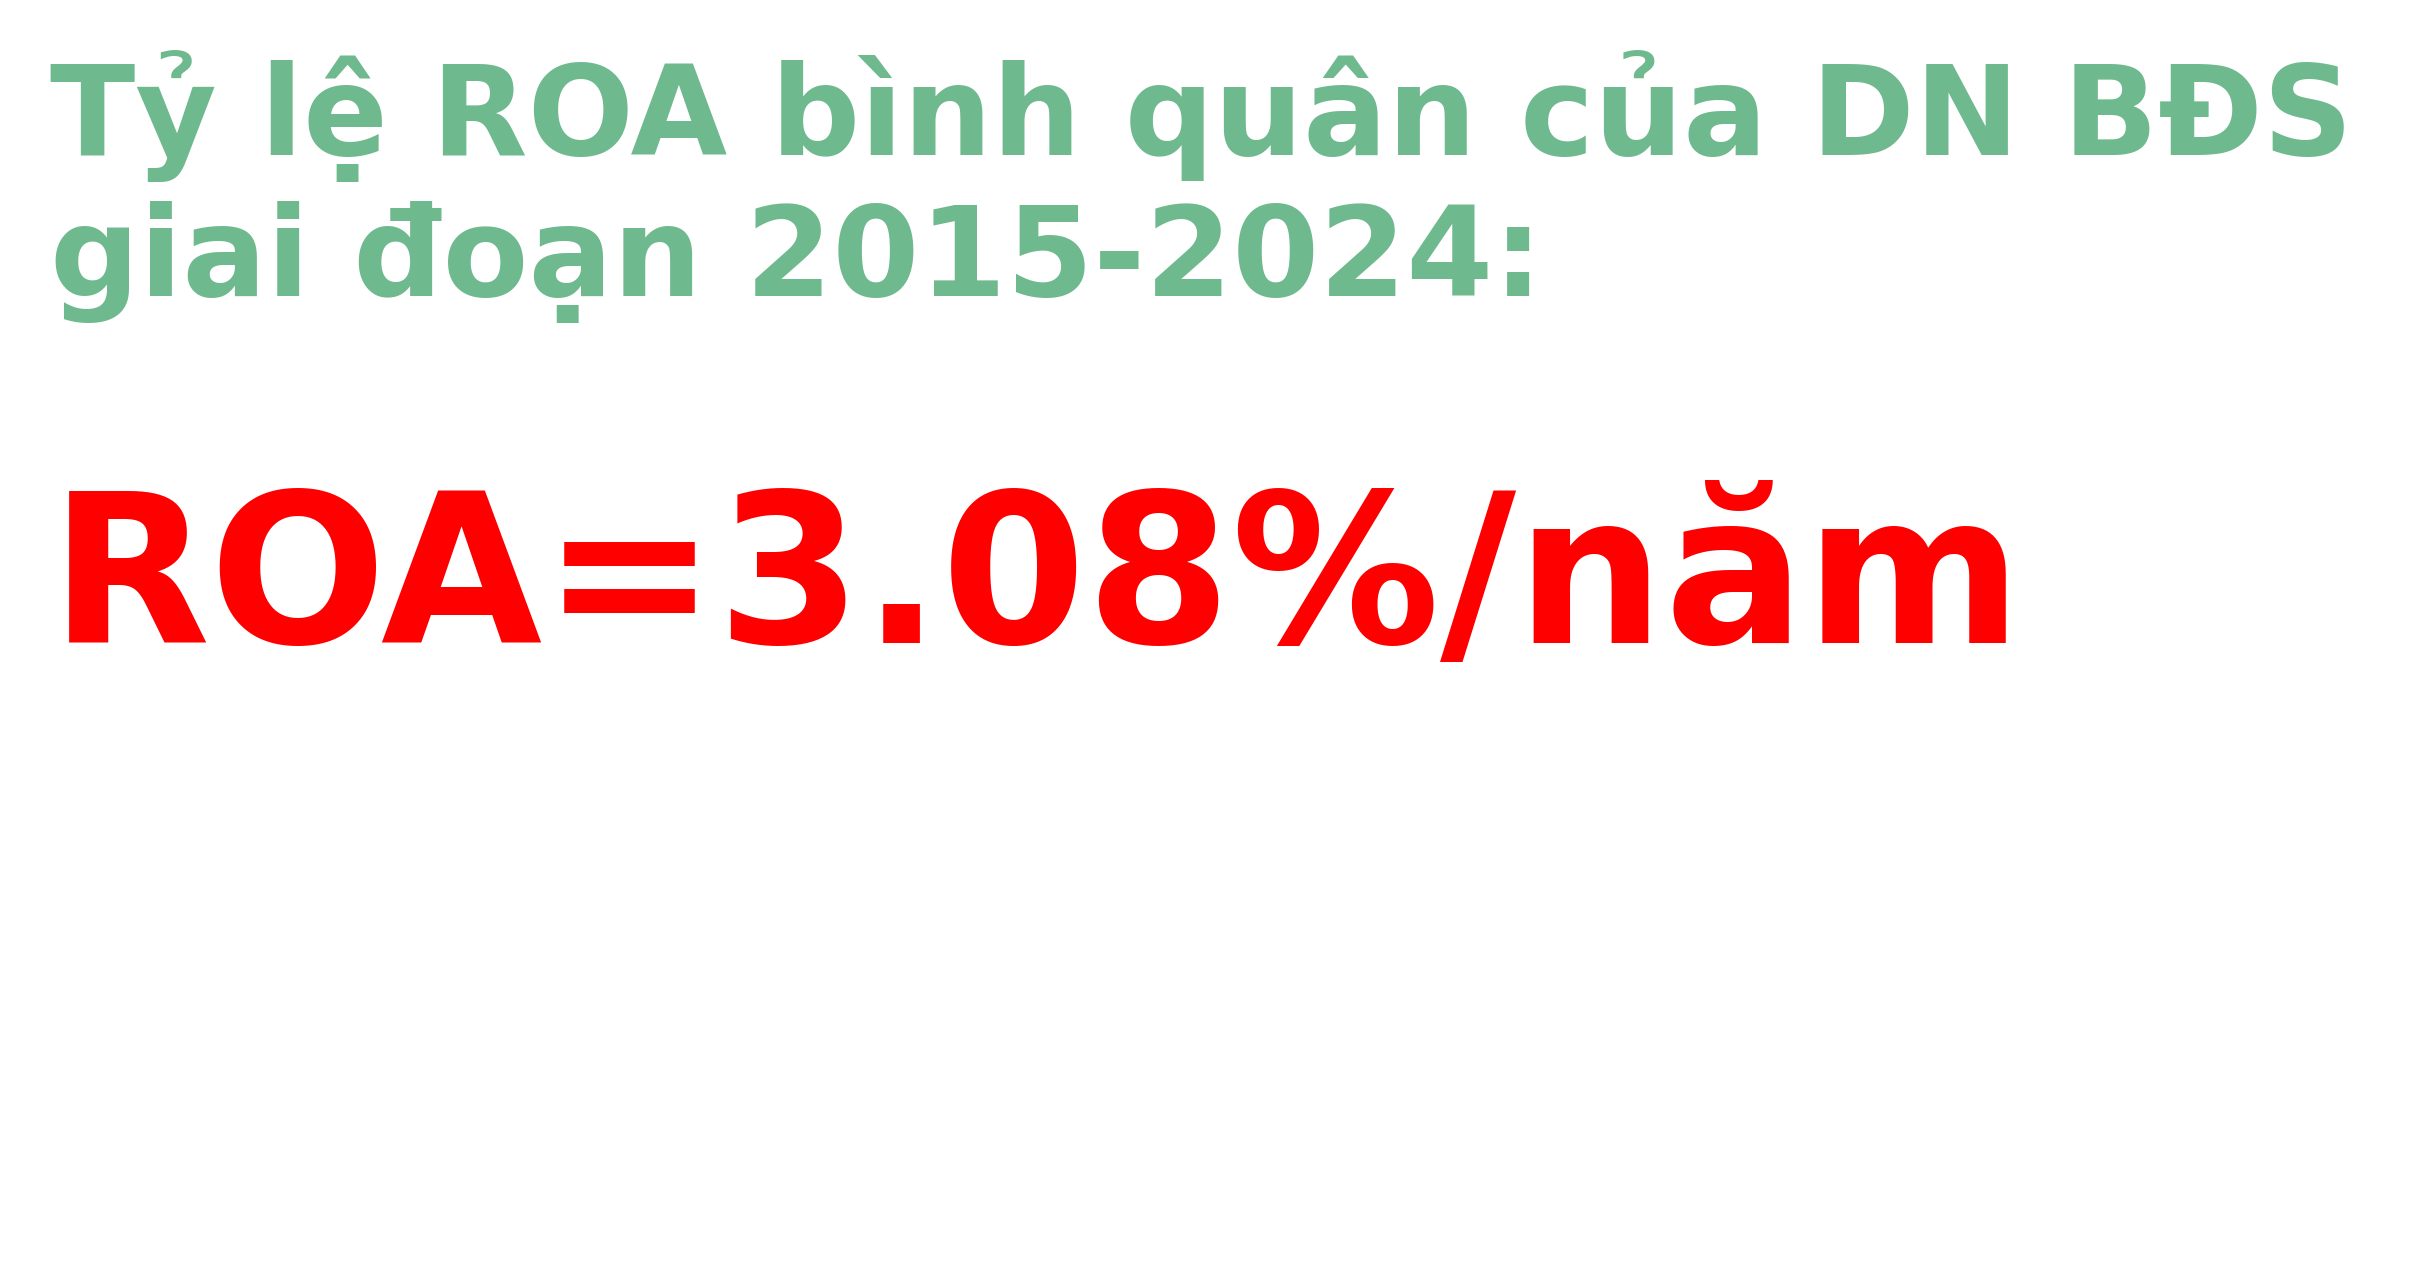

In [ ]:
import matplotlib.pyplot as plt
# Tính tỷ lệ ROA bình quân 2015-2024
plt.figure(figsize=(6,3),dpi=500)
plt.text(0,0.8,'Tỷ lệ ROA bình quân của DN BĐS\ngiai đoạn 2015-2024:',fontsize=18,fontweight='bold',color='#6FB98F')
plt.text(0,0.5,'ROA=3.08%/năm',fontsize=30,fontweight='bold',color='red')
plt.axis('off')
plt.show()

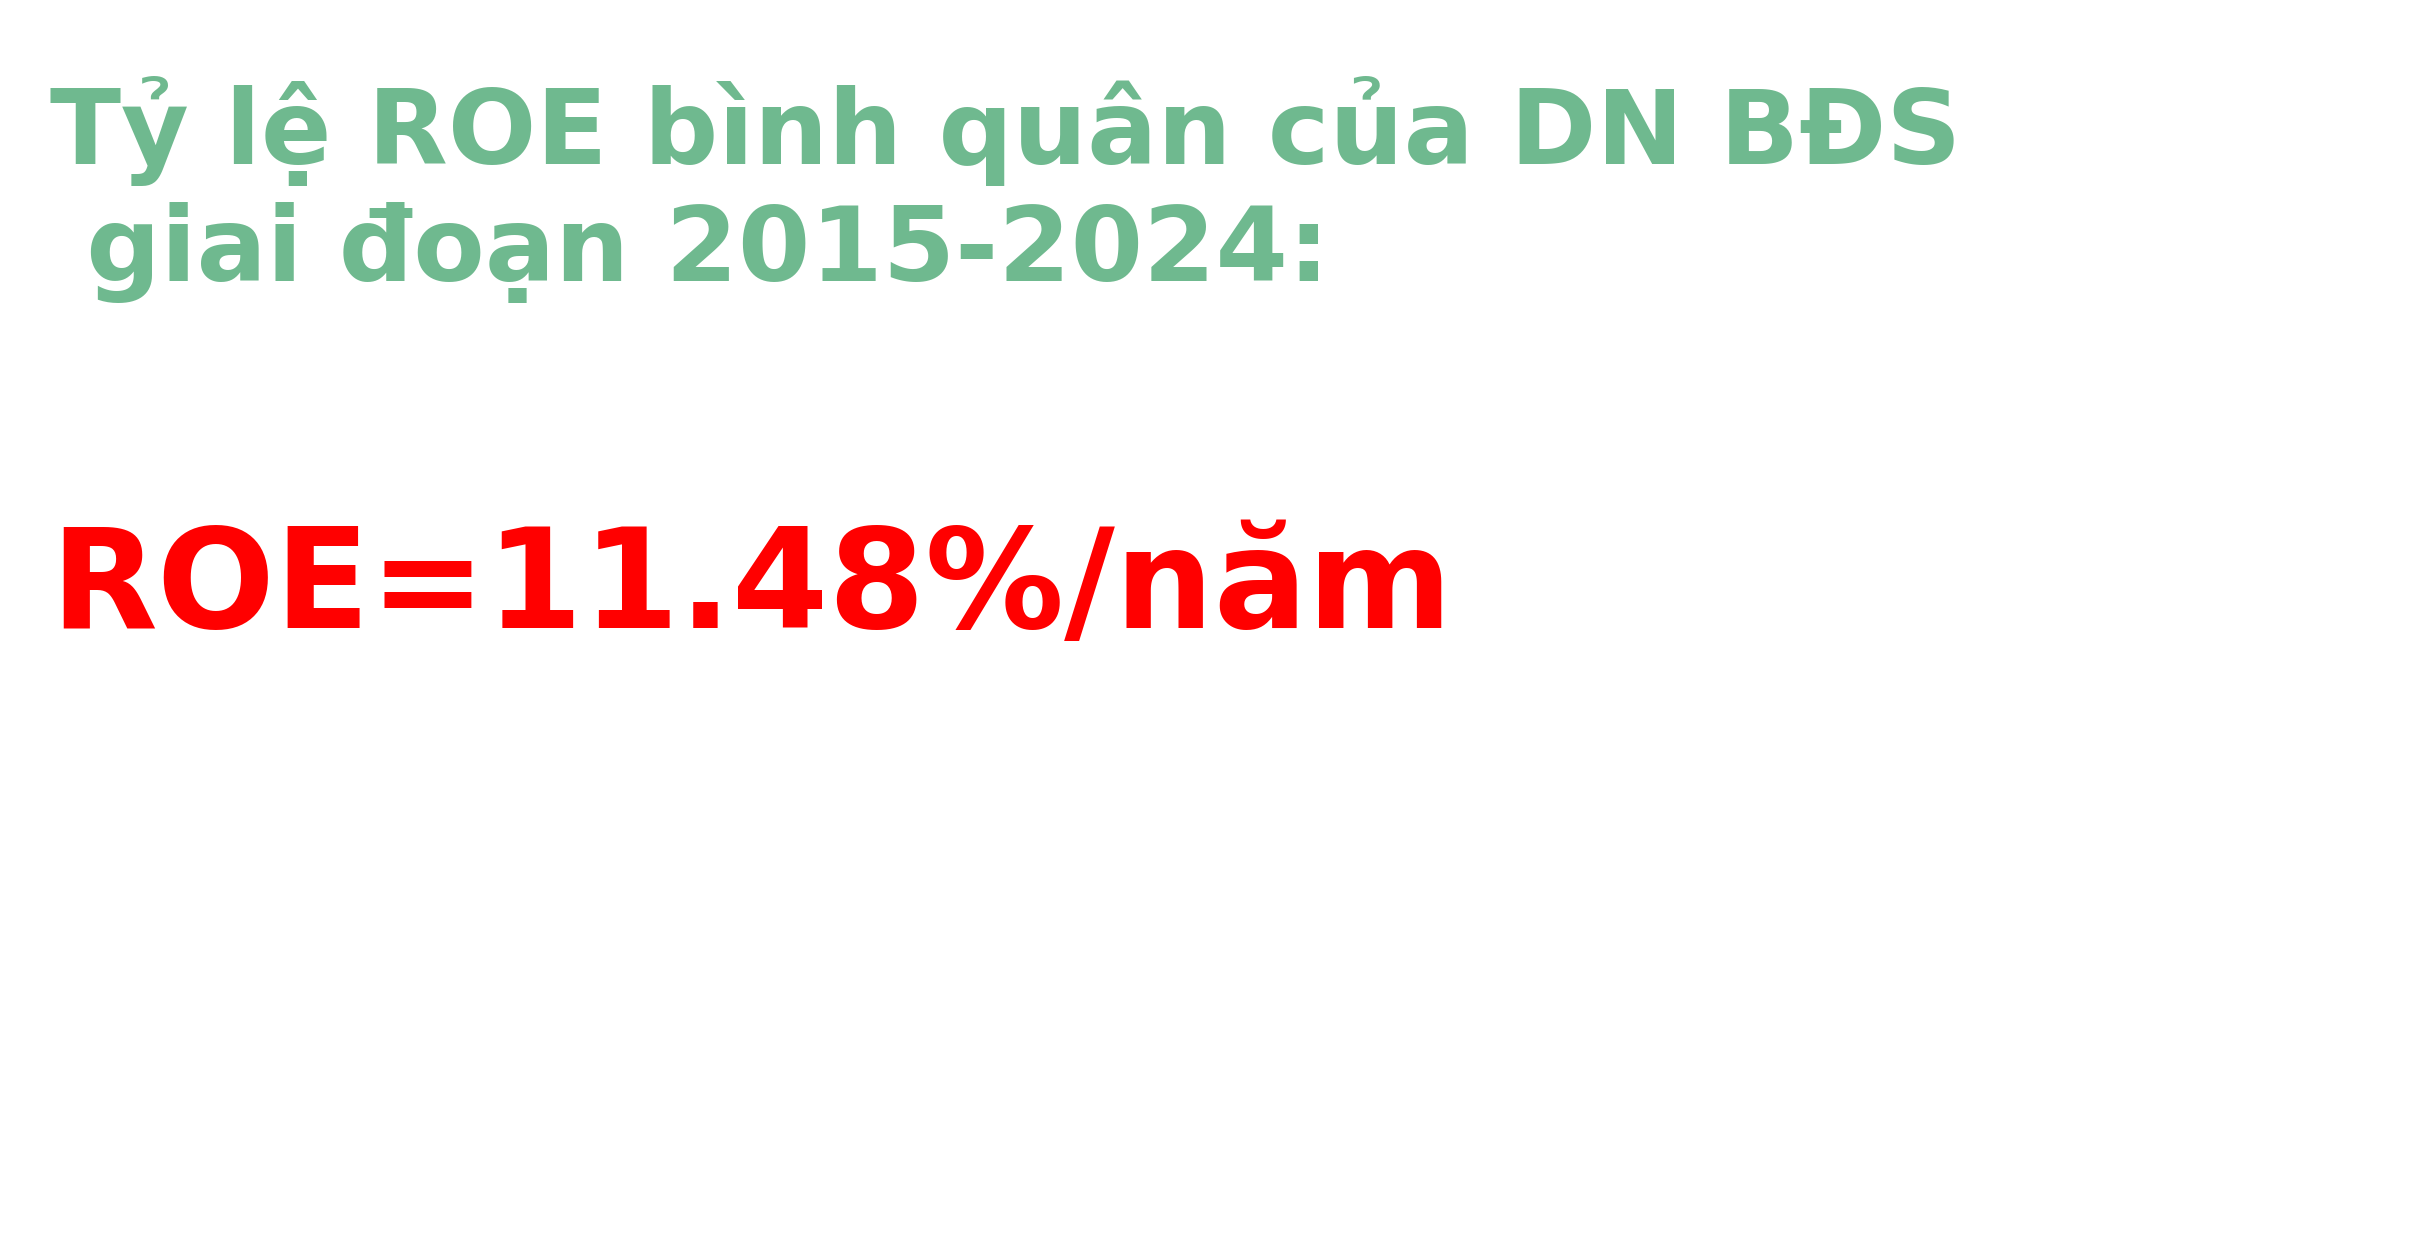

In [ ]:
# Tỷ lệ ROE bình quân 2015-2024
plt.figure(figsize=(6,3),dpi=500)
plt.text(0,0.8,'Tỷ lệ ROE bình quân của DN BĐS\n giai đoạn 2015-2024:',fontsize=15,fontweight='bold',color='#6FB98F')
plt.text(0,0.5,'ROE=11.48%/năm',fontsize=20,fontweight='bold',color='red')
plt.axis('off')
plt.show()

##**2. Biểu đồ cấp 1**

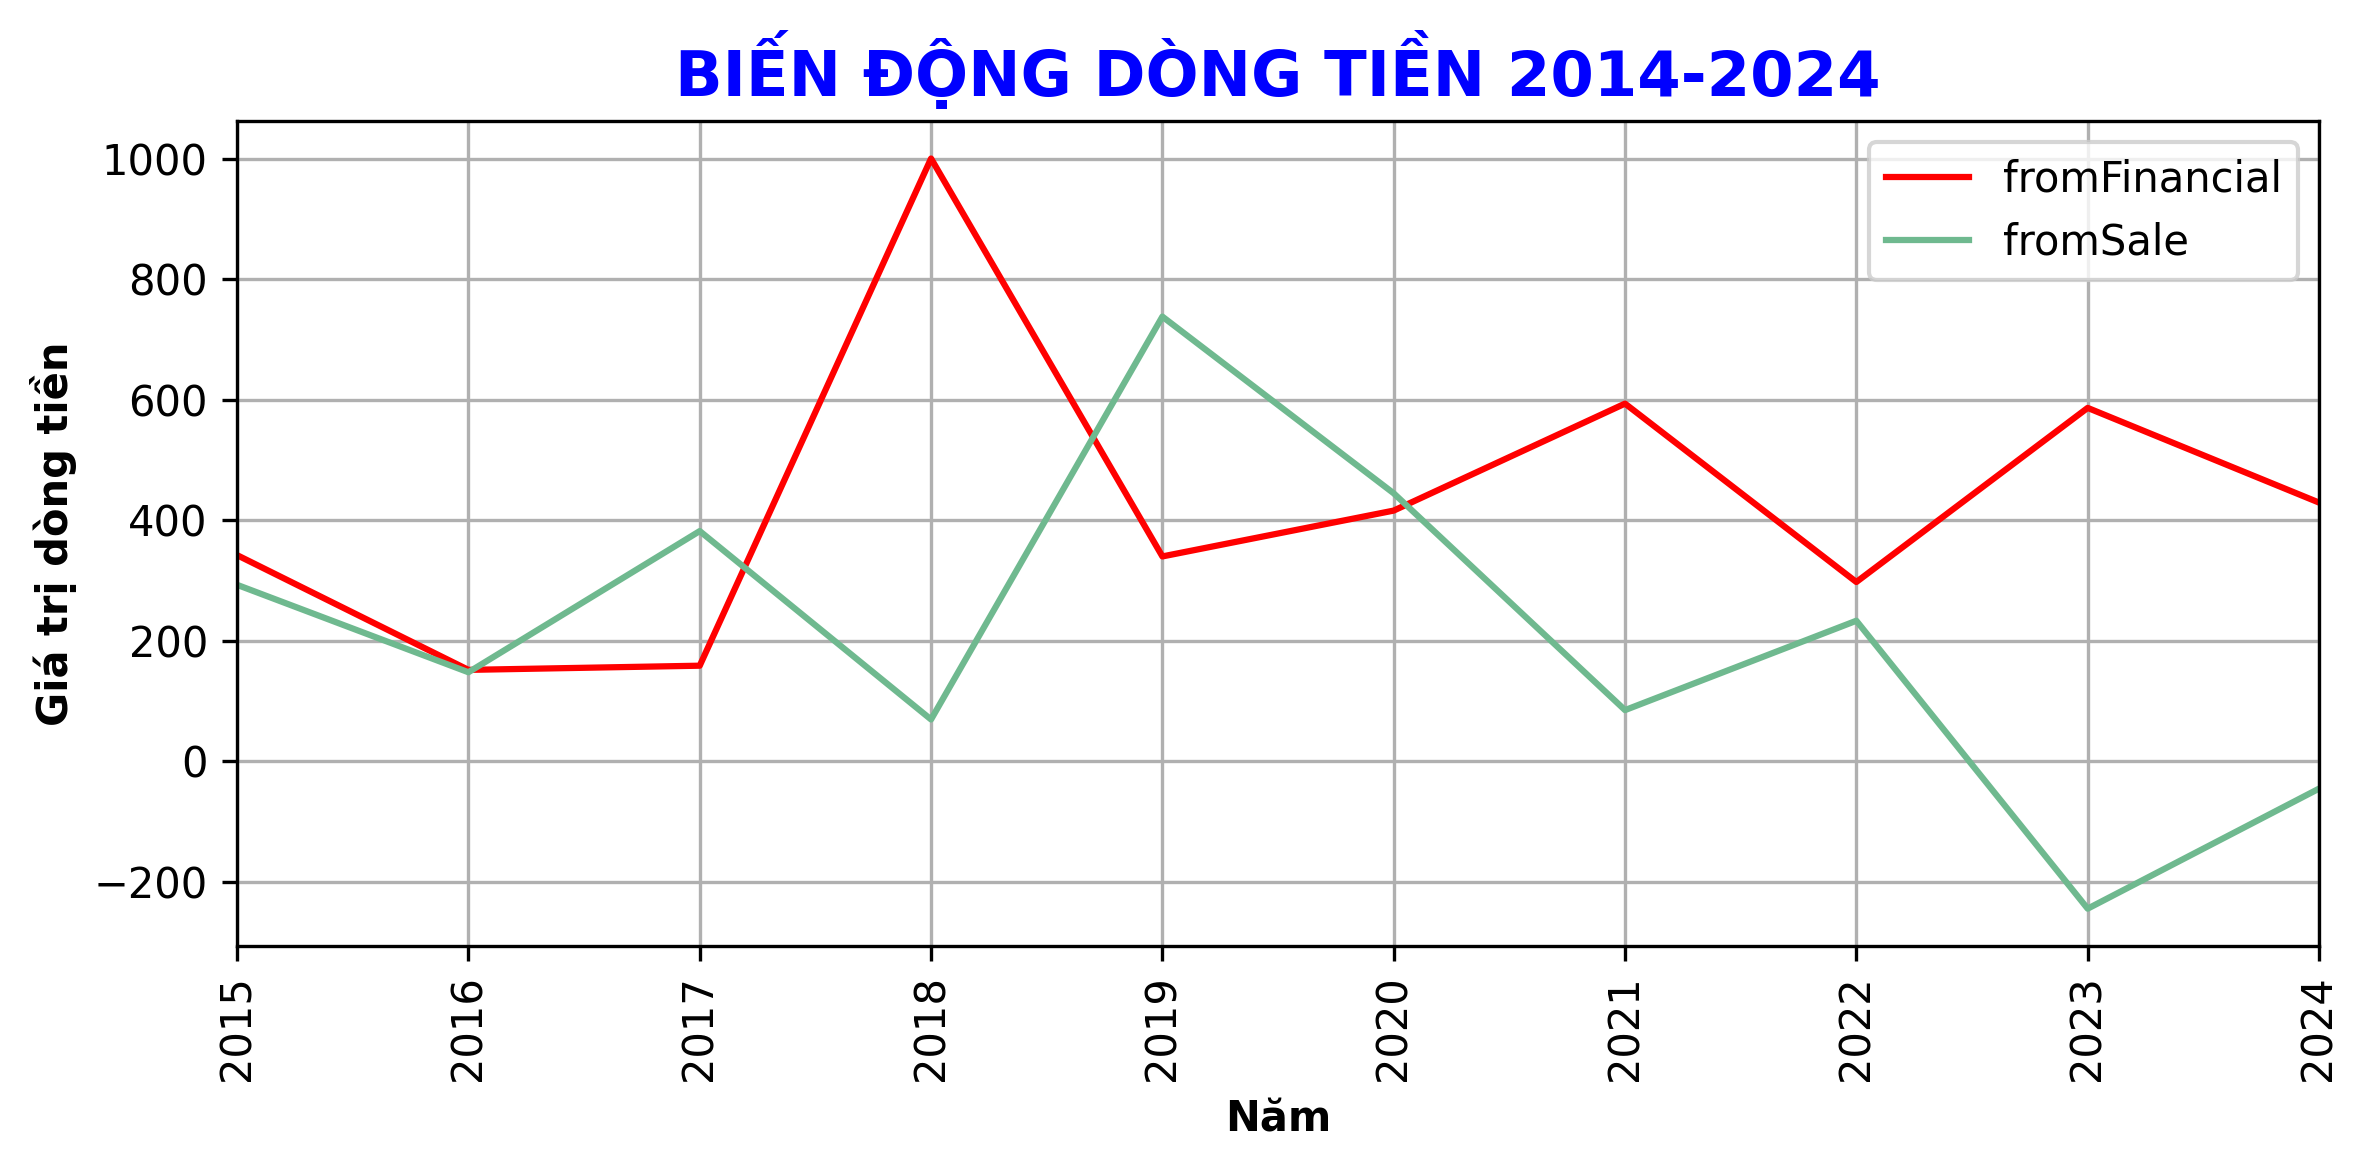

In [ ]:
# Vẽ linechart của 2 cột fromFinancial, fromSale để phân tích OCF và FCF
import matplotlib.pyplot as plt # Changed import statement
df_avg = df_lctt.groupby('year')[['fromFinancial','fromSale']].mean()
plt.figure(figsize=(8,4),dpi=300)
plt.plot(df_avg.index, df_avg['fromFinancial'], label='fromFinancial',color='red')
plt.plot(df_avg.index, df_avg['fromSale'], label='fromSale',color='#6FB98F')
plt.title('BIẾN ĐỘNG DÒNG TIỀN 2014-2024',fontsize=15,fontweight='bold',color='blue')
plt.xlabel('Năm',fontsize=10,fontweight='bold')
plt.ylabel('Giá trị dòng tiền',fontsize=10,fontweight='bold')
plt.xticks(np.arange(2015,2025,1),rotation=90)
plt.xlim(2015,2024)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_final = df_full3
df_final

year ticker  priceToEarning  priceToBook  valueBeforeEbitda  dividend  \
0     2015    BCM             NaN          NaN                NaN       NaN   
1     2016    BCM             NaN          NaN               36.3       NaN   
2     2017    BCM             NaN          NaN               22.6       NaN   
3     2018    BCM            11.2          2.0               19.5       NaN   
4     2019    BCM            12.2          2.1                NaN       NaN   
...    ...    ...             ...          ...                ...       ...   
1451  2020    VRG            64.5          2.6             -325.2     0.015   
1452  2021    VRG           154.4          2.5             -264.2       NaN   
1453  2022    VRG            14.5          2.3                9.3     0.064   
1454  2023    VRG             3.5          1.4                3.0     0.152   
1455  2024    VRG            10.9          1.6                4.7       NaN   

        roe    roa  daysReceivable  daysInventory  ...  shortDebt       Size  \
0     0.050  0.010           241.0         1423.0  ...       7138  10.848793   
1     0.076  0.014           293.0         1661.0  ...       7474  10.955113   
2     0.082  0.016           315.0         2063.0  ...       8604  10.842870   
3     0.197  0.045           295.0         2702.0  ...      10517  10.718520   
4     0.185  0.056           177.0         1683.0  ...       9259  10.680884   
...     ...    ...             ...            ...  ...        ...        ...   
1451  0.039  0.017          4377.0            NaN  ...          0   6.483107   
1452  0.016  0.007          4409.0            NaN  ...          0   6.429719   
1453  0.169  0.076           634.0            NaN  ...          0   6.551080   
1454  0.480  0.200           215.0            NaN  ...          0   7.064759   
1455  0.136  0.053          1187.0            3.0  ...          0   6.936343   

           LEV       CUR  GROWTH  fromFinancial  fromSale  establishedYear_x  \
0     0.780152  4.691790   0.258         2822.0   -2580.0               2006   
1     0.772054  4.953706  -0.005          959.0    1339.0               2006   
2     0.788227  4.321478  -0.068         1381.0   -2351.0               2006   
3     0.701427  2.901303  -0.039        -1953.0     659.0               2006   
4     0.638041  3.020305   0.256        -5378.0    2932.0               2006   
...        ...       ...     ...            ...       ...                ...   
1451  0.576453       inf  -0.600          -20.0      -8.0               2012   
1452  0.564516       inf  -0.181          -10.0     -63.0               2012   
1453  0.542857       inf   5.890           -1.0     -29.0               2012   
1454  0.608547       inf   3.468          -46.0     496.0               2012   
1455  0.603499       inf  -0.793          -96.0       7.0               2012   

      establishedYear_y   AGE  
0                  2006  10.0  
1                  2006  11.0  
2                  2006  12.0  
3                  2006  13.0  
4                  2006  14.0  
...                 ...   ...  
1451               2012   9.0  
1452               2012  10.0  
1453               2012  11.0  
1454               2012  12.0  
1455               2012  13.0  

[1456 rows x 56 columns]

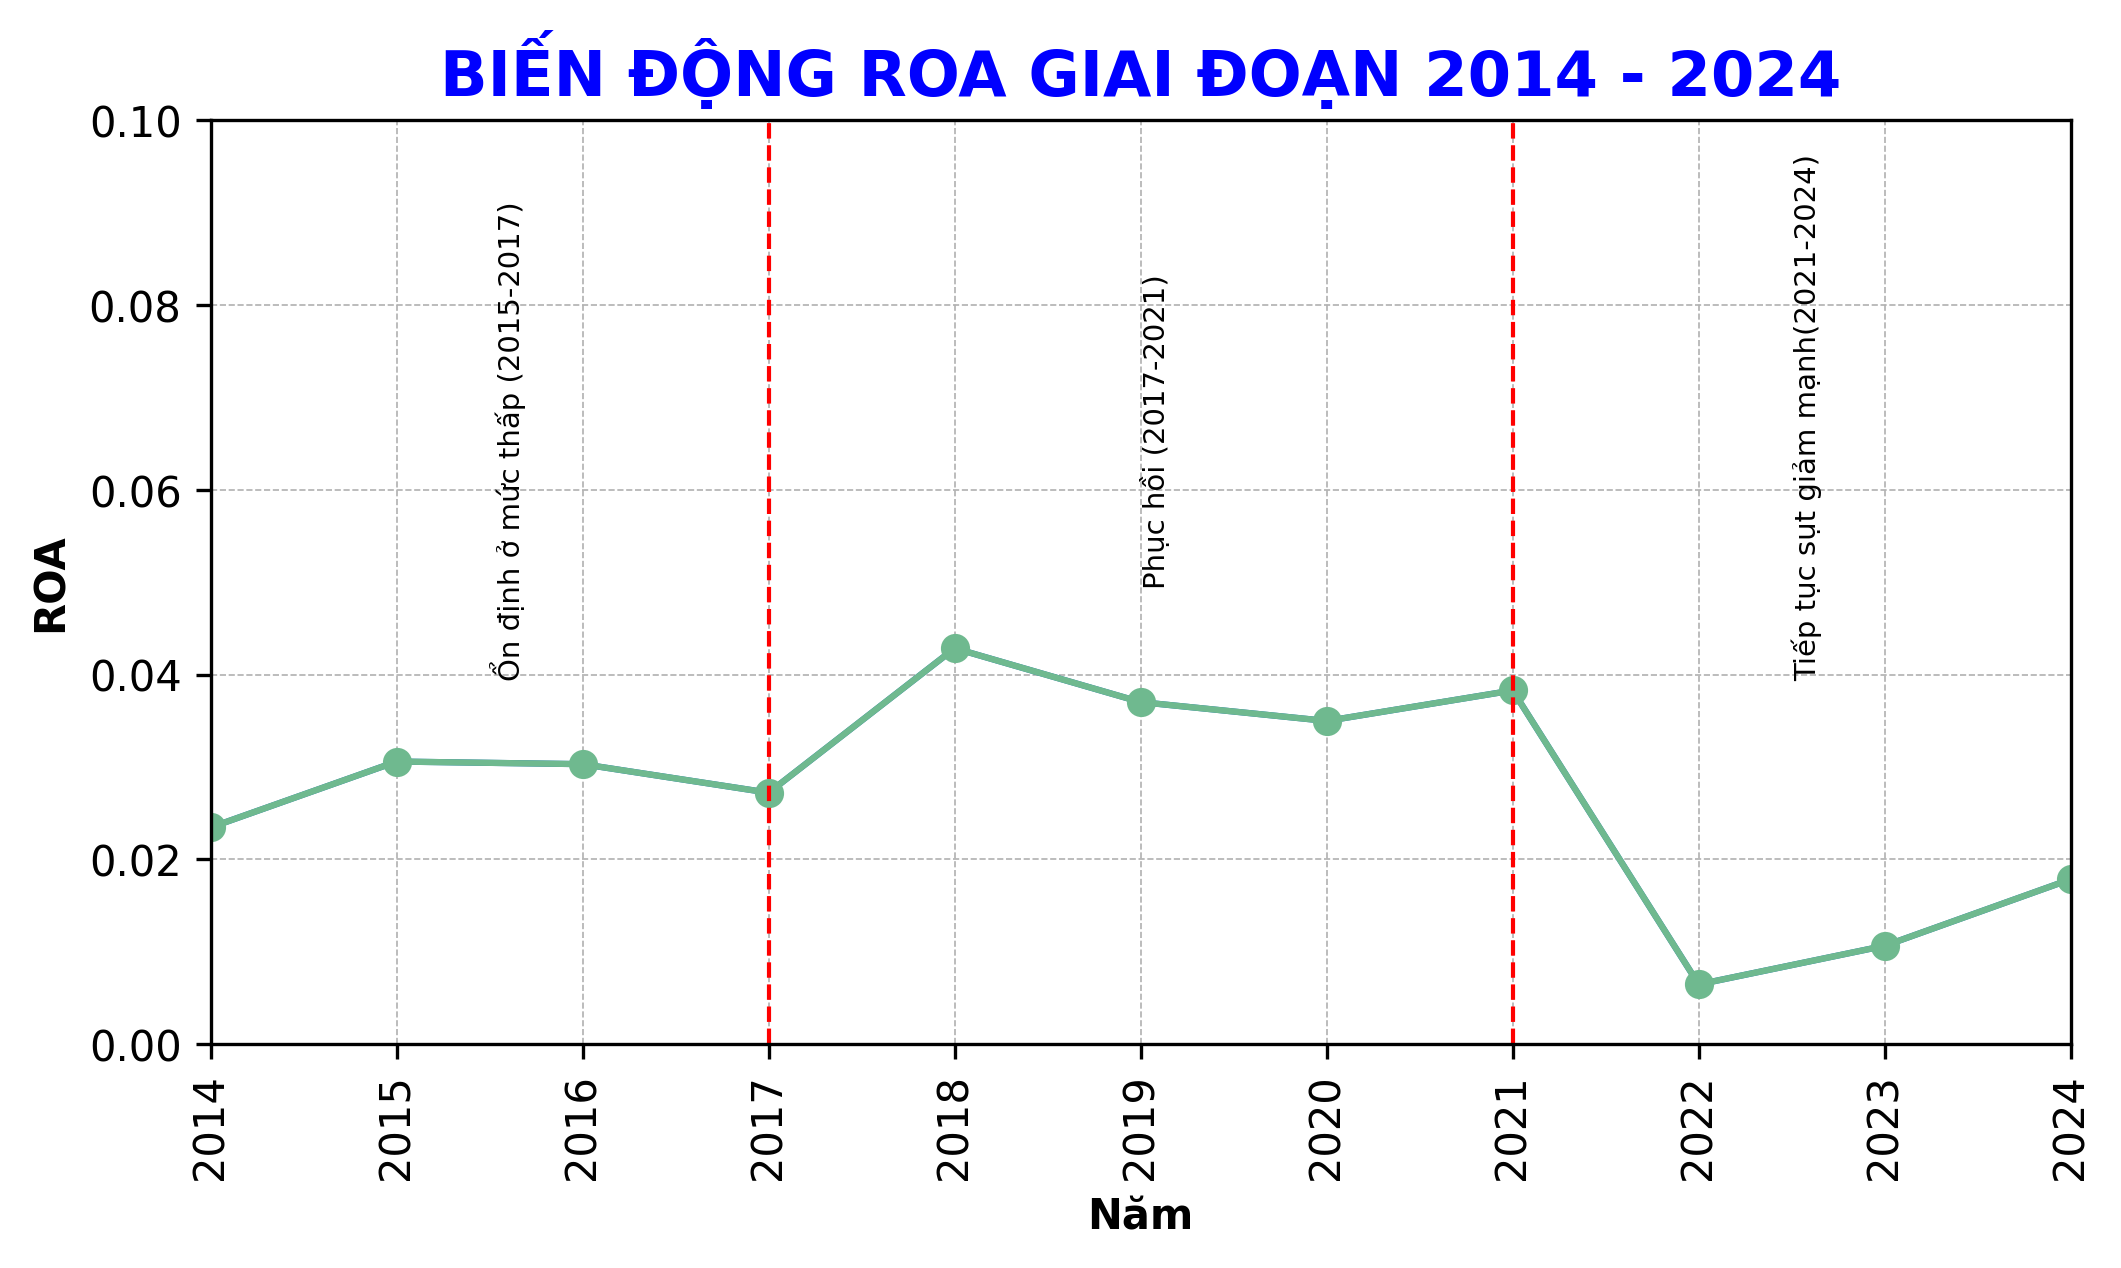

In [ ]:
# Vẽ biểu đồ biến động ROA
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4),dpi=300)
plt.plot(df_final.groupby('year')['roa'].mean())
plt.xlabel('Năm',fontsize=10,fontweight='bold')
plt.ylabel('ROA',fontsize=10,fontweight='bold')
plt.xlim(2015,2024)
plt.ylim(0,0.1)
plt.title('BIẾN ĐỘNG ROA GIAI ĐOẠN 2014 - 2024',fontsize=15,fontweight='bold',color='blue')
plt.plot(df_final.groupby('year')['roa'].mean(),marker='o',color='#6FB98F')
plt.xticks(np.arange(2014,2025,1),rotation=90)
plt.grid(True, linestyle='--', linewidth=0.4)
plt.axvline(x=2017, color='r', linestyle='--', linewidth=1)
plt.axvline(x=2021, color='r', linestyle='--', linewidth=1)
plt.text(2015.5,0.04,'Ổn định ở mức thấp (2015-2017)',fontsize=7,rotation=90)
plt.text(2019,0.05,'Phục hồi (2017-2021)',fontsize=7, rotation=90)
plt.text(2022.5,0.04,'Tiếp tục sụt giảm mạnh(2021-2024)',fontsize=7,rotation=90)
plt.show()

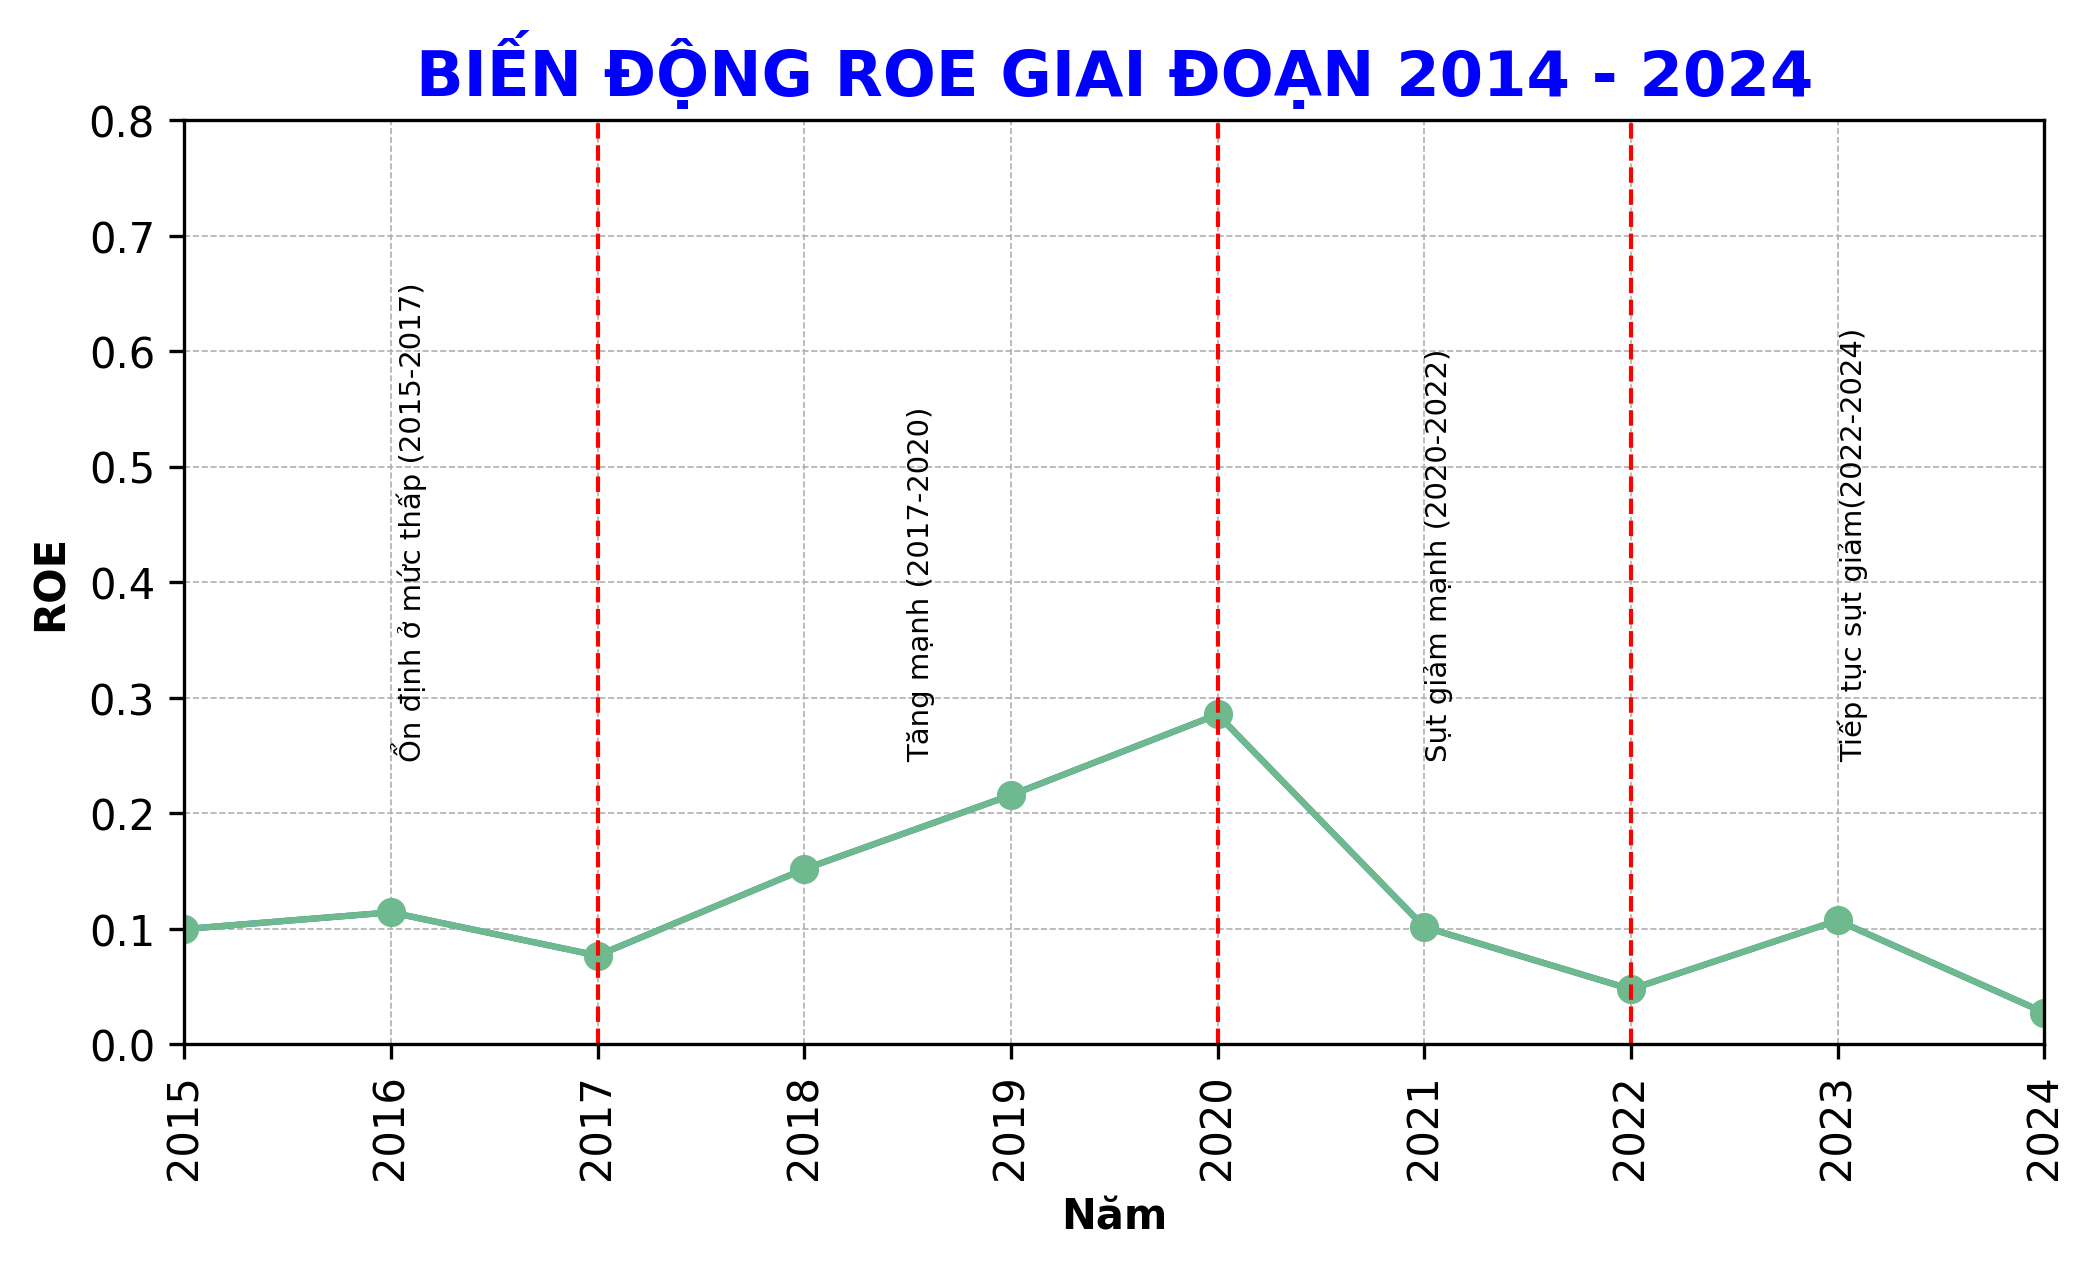

In [ ]:
#Vẽ biểu đồ biến động ROE giai đoạn 2014-2024
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4),dpi=300)
plt.plot(df_final.groupby('year')['roe'].mean())
plt.xlabel('Năm',fontsize=10,fontweight='bold')
plt.ylabel('ROE',fontsize=10,fontweight='bold')
plt.xlim(2015,2024)
plt.ylim(0,0.8)
plt.title('BIẾN ĐỘNG ROE GIAI ĐOẠN 2014 - 2024',fontsize=15,fontweight='bold',color='blue')
plt.plot(df_final.groupby('year')['roe'].mean(),marker='o',color='#6FB98F')
plt.xticks(np.arange(2015,2025,1),rotation=90)
plt.grid(True, linestyle='--', linewidth=0.4)
plt.axvline(x=2017, color='r', linestyle='--', linewidth=1)
plt.axvline(x=2020, color='r', linestyle='--', linewidth=1)
plt.axvline(x=2022, color='r', linestyle='--', linewidth=1)
plt.text(2016,0.25,'Ổn định ở mức thấp (2015-2017)',fontsize=7,rotation=90)
plt.text(2018.5,0.25,'Tăng mạnh (2017-2020)',fontsize=7, rotation=90)
plt.text(2021,0.25,'Sụt giảm mạnh (2020-2022)',fontsize=7, rotation=90)
plt.text(2023,0.25,'Tiếp tục sụt giảm(2022-2024)',fontsize=7,rotation=90)
plt.show()

##**3. Biểu đồ cấp 2**

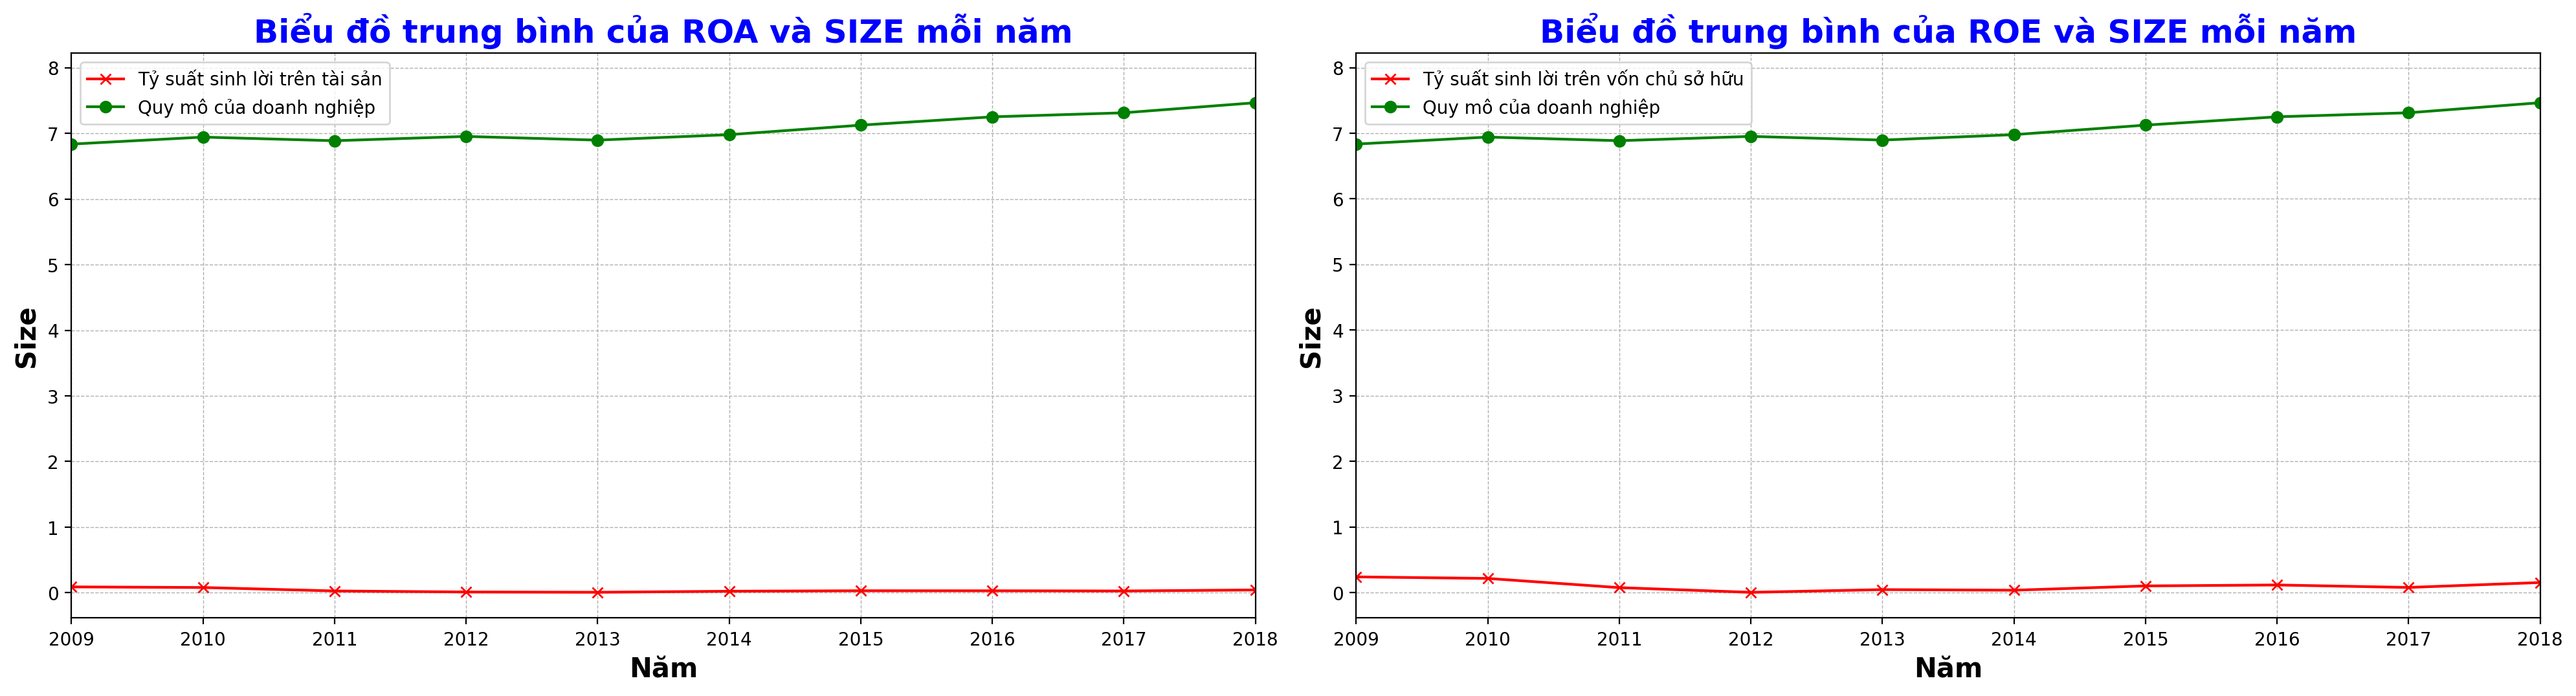

In [ ]:
#Biểu đồ trung bình của ROA và ROE với SIZE theo các năm
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10),dpi=200)

plt.subplot(2, 2, 1)
roa_tb = df_full3.groupby('year')['roa'].mean()
size_tb = df_full3.groupby('year')['Size'].mean()

plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROA và SIZE mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roa_tb.index,roa_tb,label='Tỷ suất sinh lời trên tài sản',marker='x',color='red')
plt.plot(size_tb.index,size_tb,label='Quy mô của doanh nghiệp',marker='o',color='green')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('Size', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
roe_tb = df_full3.groupby('year')['roe'].mean()
size_tb =df_full3.groupby('year')['Size'].mean()
plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROE và SIZE mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roe_tb.index,roe_tb,label='Tỷ suất sinh lời trên vốn chủ sở hữu',marker='x',color='red')
plt.plot(size_tb.index,size_tb,label='Quy mô của doanh nghiệp',marker='o',color='green')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('Size', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

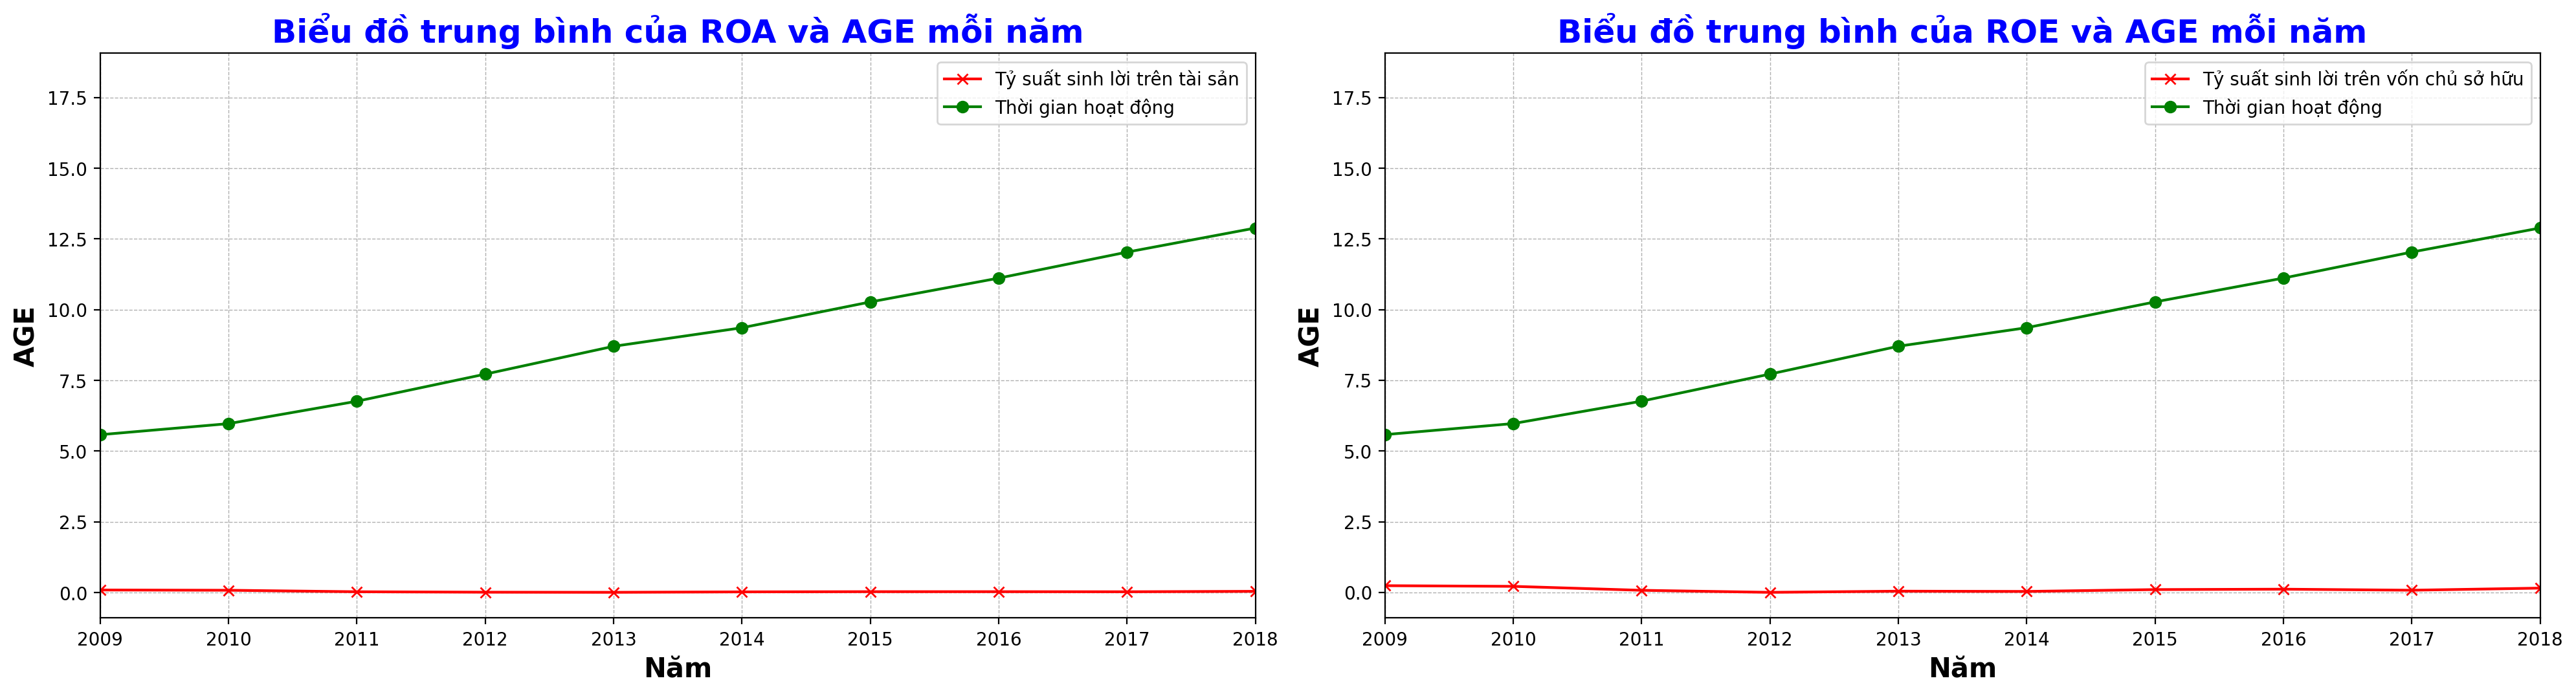

In [ ]:
#Biểu đồ trung bình của ROA và ROE với AGE theo các năm
plt.figure(figsize=(20, 10),dpi=200)
plt.subplot(2, 2, 1)
roa_tb = df_full3.groupby('year')['roa'].mean()
age_tb = df_full3.groupby('year')['AGE'].mean()

plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROA và AGE mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roa_tb.index,roa_tb,label='Tỷ suất sinh lời trên tài sản',marker='x',color='red')
plt.plot(age_tb.index,age_tb,label='Thời gian hoạt động',marker='o',color='green')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('AGE', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
roe_tb = df_full3.groupby('year')['roe'].mean()
age_tb = df_full3.groupby('year')['AGE'].mean()

plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROE và AGE mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roe_tb.index,roe_tb,label='Tỷ suất sinh lời trên vốn chủ sở hữu',marker='x',color='red')
plt.plot(age_tb.index,age_tb,label='Thời gian hoạt động',marker='o',color='green')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('AGE', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

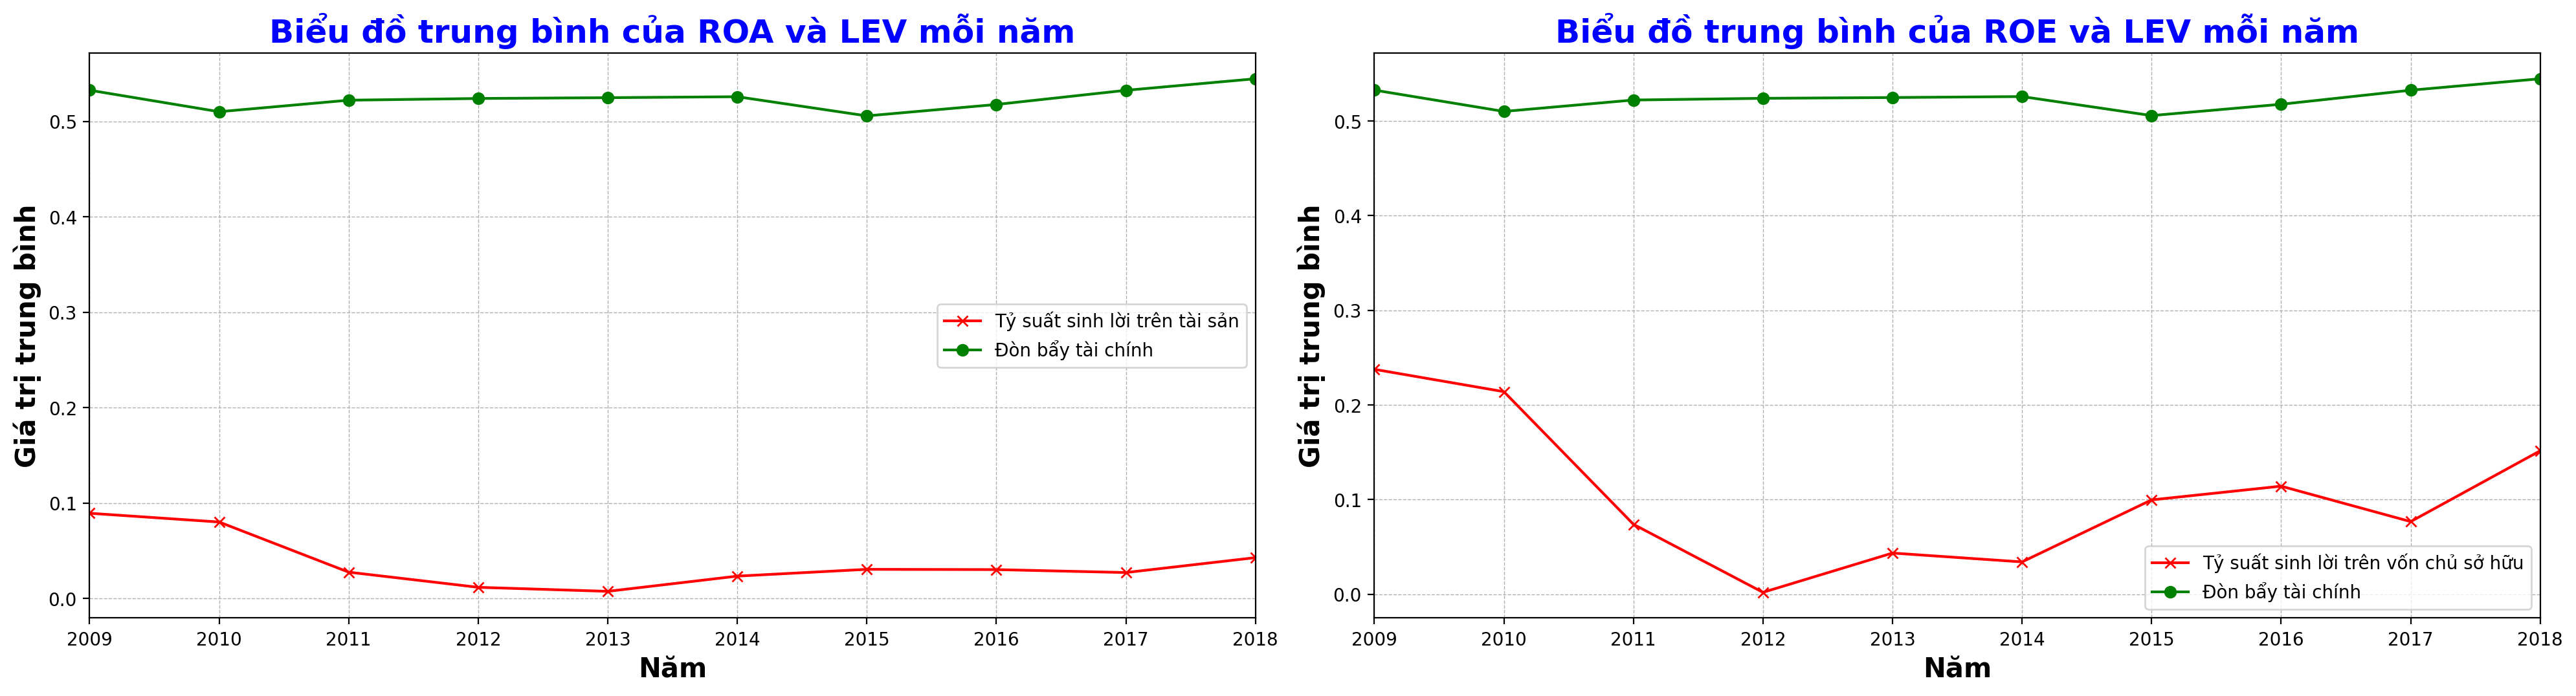

In [ ]:
#Biểu đồ trung bình của ROA và ROE với LEV theo các năm
plt.figure(figsize=(20, 10),dpi=200)
roa_tb=df_full3.groupby('year')['roa'].mean()
lev_tb =df_full3.groupby('year')['LEV'].mean()

plt.subplot(2, 2, 1)
plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROA và LEV mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roa_tb.index,roa_tb,label='Tỷ suất sinh lời trên tài sản',marker='x',color='r')
plt.plot(lev_tb.index,lev_tb,label='Đòn bẩy tài chính',marker='o',color='g')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('Giá trị trung bình', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
roe_tb = df_full3.groupby('year')['roe'].mean()
lev_tb = df_full3.groupby('year')['LEV'].mean()

plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROE và LEV mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roe_tb.index,roe_tb,label='Tỷ suất sinh lời trên vốn chủ sở hữu',marker='x',color='r')
plt.plot(lev_tb.index,lev_tb,label='Đòn bẩy tài chính',marker='o',color='g')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('Giá trị trung bình', fontsize=15, fontweight='bold')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

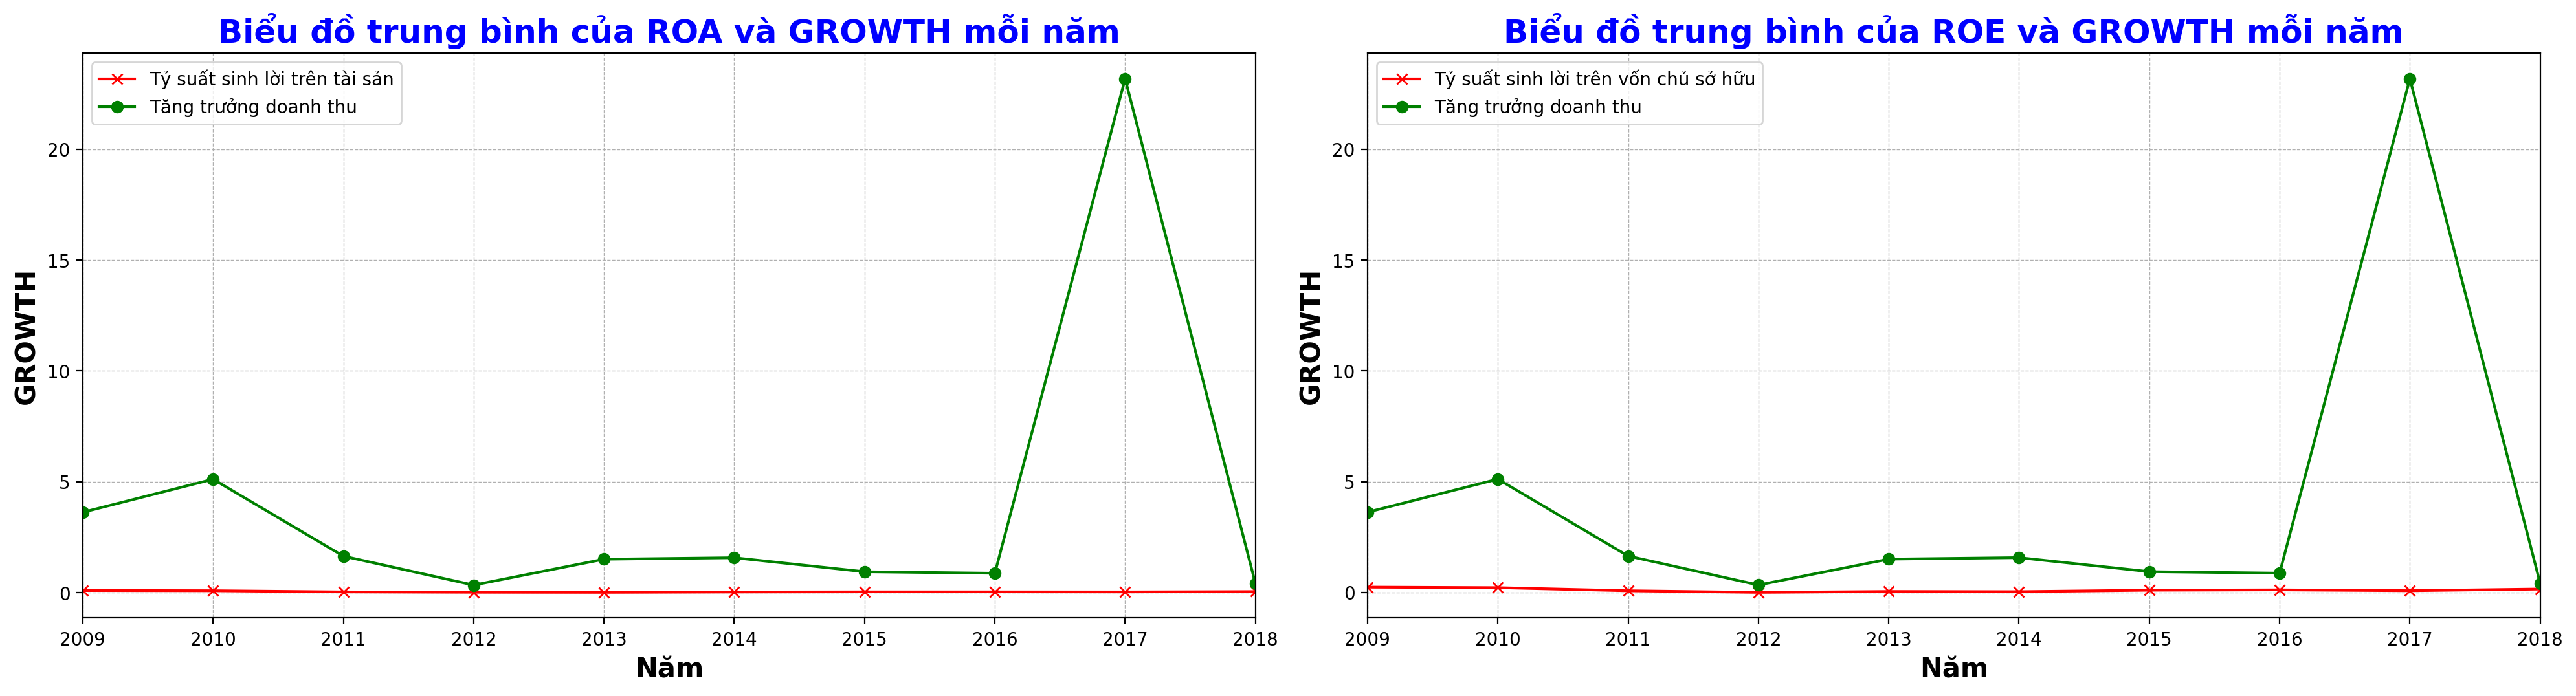

In [ ]:
#Biểu đồ trung bình của ROA và ROE với GROWTH theo các năm
plt.figure(figsize=(20, 10),dpi=200)

plt.subplot(2, 2, 1)
roa_tb = df_full3.groupby('year')['roa'].mean()
growth_tb =df_full3.groupby('year')['GROWTH'].mean()

plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROA và GROWTH mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roa_tb.index,roa_tb,label='Tỷ suất sinh lời trên tài sản',marker='x',color='r')
plt.plot(growth_tb.index,growth_tb,label='Tăng trưởng doanh thu',marker='o',color='g')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('GROWTH', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
roa_tb = df_full3.groupby('year')['roa'].mean()
growth_tb = df_full3.groupby('year')['GROWTH'].mean()

plt.xlim(2009,2018)
plt.title('Biểu đồ trung bình của ROE và GROWTH mỗi năm',fontweight='bold',color='blue',fontsize=18)
plt.plot(roe_tb.index,roe_tb,label='Tỷ suất sinh lời trên vốn chủ sở hữu',marker='x',color='r')
plt.plot(growth_tb.index,growth_tb,label='Tăng trưởng doanh thu',marker='o',color='g')
plt.xlabel('Năm', fontsize=15, fontweight='bold')
plt.ylabel('GROWTH', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

<Axes: >

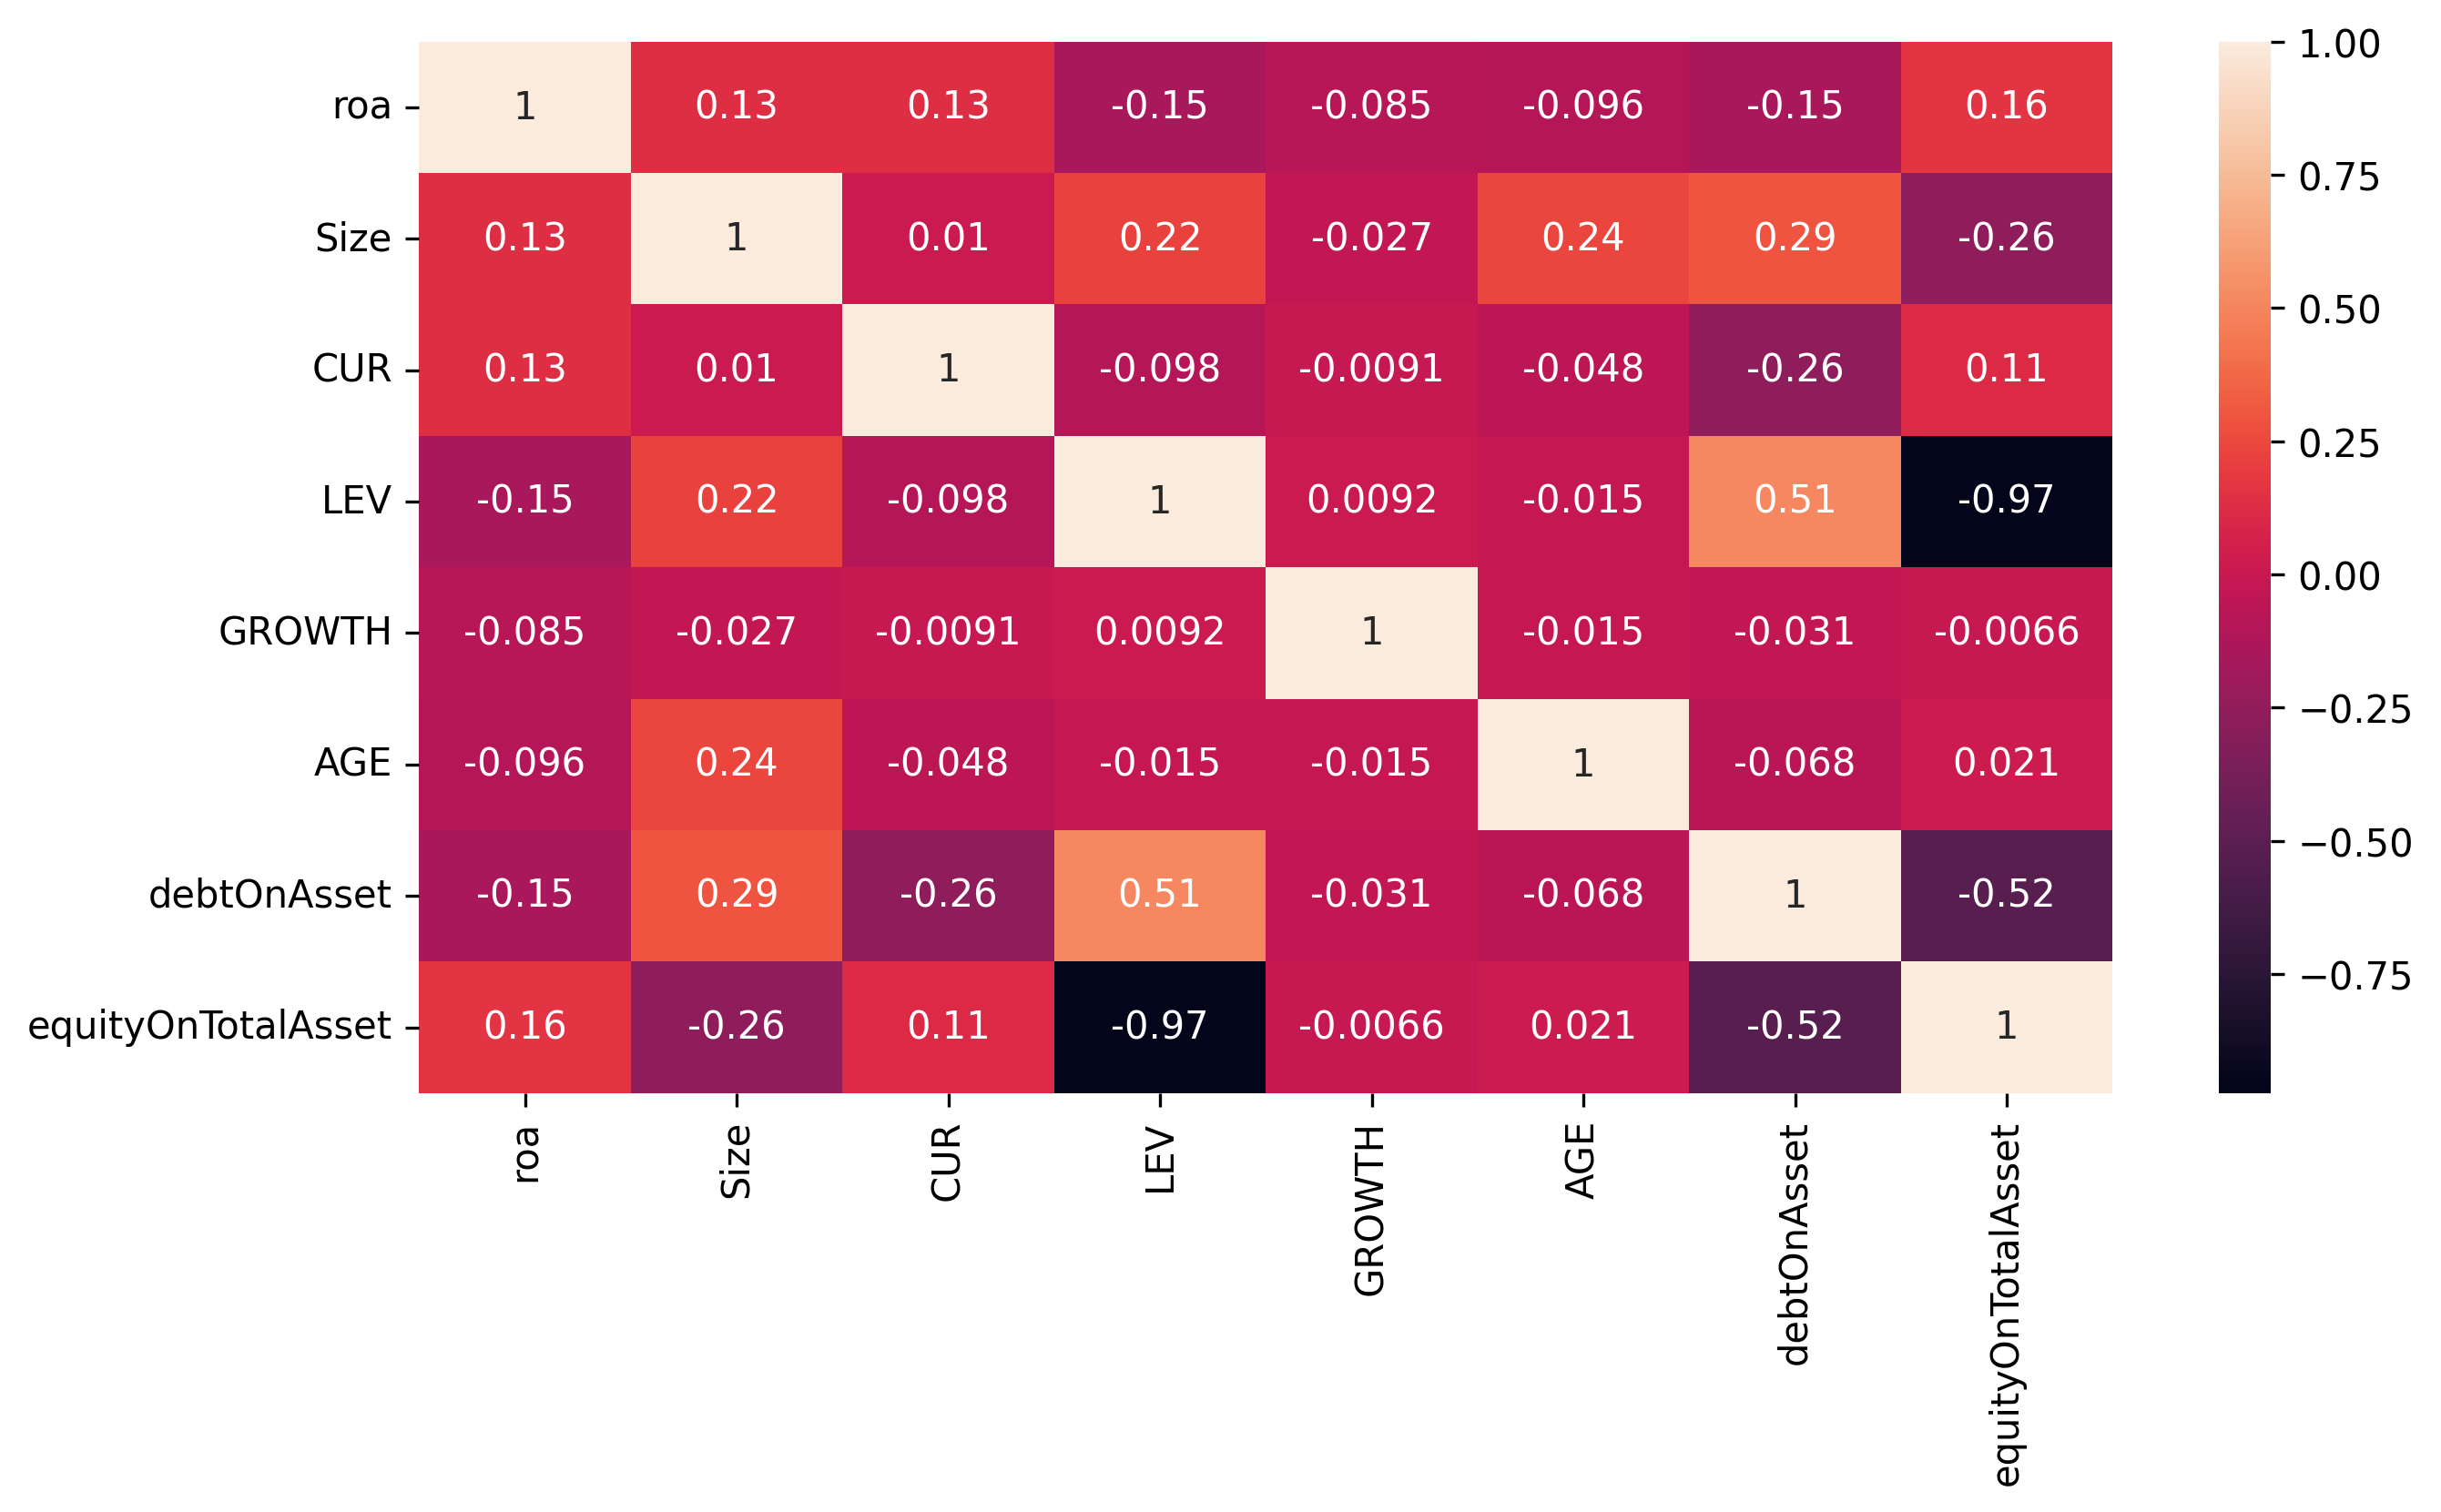

In [ ]:
# Vẽ biểu đồ nhiệt
import seaborn as sns
plt.figure(figsize=(10,5), dpi=300)
sns.heatmap(df_full3[['roa','Size','CUR','LEV','GROWTH','AGE','debtOnAsset','equityOnTotalAsset']].corr(), annot=True)

#**GỘP BIỂU ĐỒ**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15),dpi=500)

plt.subplot(4 ,2 ,1)
plt.text(0,0.8,'Tỷ lệ ROA bình quân của DN BĐS\ngiai đoạn 2015-2024:',fontsize=18,fontweight='bold',color='#6FB98F')
plt.text(0,0.6,'ROA=3.08%/năm',fontsize=30,fontweight='bold',color='red')
plt.text(0,0.3,'Tỷ lệ ROE bình quân của DN BĐS\n giai đoạn 2015-2024:',fontsize=15,fontweight='bold',color='#6FB98F')
plt.text(0,0.05,'ROE=11.48%/năm',fontsize=30,fontweight='bold',color='red')
plt.axis('off')

plt.subplot(4,2 ,2)
plt.plot(df_full3.groupby('year')['roa'].mean())
plt.xlabel('Năm',fontsize=10,fontweight='bold')
plt.ylabel('ROA',fontsize=10,fontweight='bold')
plt.xlim(2015,2024)
plt.ylim(0,0.1)
plt.title('BIẾN ĐỘNG ROA GIAI ĐOẠN 2014 - 2024',fontsize=15,fontweight='bold',color='blue')
plt.plot(df_full3.groupby('year')['roa'].mean(),marker='o',color='#6FB98F')
plt.xticks(np.arange(2014,2025,1),rotation=90)
plt.grid(True, linestyle='--', linewidth=0.4)
plt.axvline(x=2017, color='r', linestyle='--', linewidth=1)
plt.axvline(x=2021, color='r', linestyle='--', linewidth=1)
plt.text(2015.5,0.04,'Ổn định ở mức thấp (2015-2017)',fontsize=7,rotation=90)
plt.text(2019,0.05,'Phục hồi (2017-2021)',fontsize=7, rotation=90)
plt.text(2022.5,0.04,'Tiếp tục sụt giảm mạnh(2021-2024)',fontsize=7,rotation=90)

plt.subplot(4,2,3)
plt.plot(df_full3.groupby('year')['roe'].mean())
plt.xlabel('Năm',fontsize=10,fontweight='bold')
plt.ylabel('ROE',fontsize=10,fontweight='bold')
plt.xlim(2014,2024)
plt.ylim(0,0.8)
plt.title('BIẾN ĐỘNG ROE GIAI ĐOẠN 2014 - 2024',fontsize=15,fontweight='bold',color='blue')
plt.plot(df_full3.groupby('year')['roe'].mean(),marker='o',color='#6FB98F')
plt.xticks(np.arange(2014,2025,1),rotation=90)
plt.grid(True, linestyle='--', linewidth=0.4)
plt.axvline(x=2017, color='r', linestyle='--', linewidth=1)
plt.axvline(x=2020, color='r', linestyle='--', linewidth=1)
plt.axvline(x=2022, color='r', linestyle='--', linewidth=1)
plt.text(2016,0.25,'Ổn định ở mức thấp (2015-2017)',fontsize=7,rotation=90)
plt.text(2018.5,0.25,'Tăng mạnh (2017-2020)',fontsize=7, rotation=90)
plt.text(2021,0.25,'Sụt giảm mạnh (2020-2022)',fontsize=7, rotation=90)
plt.text(2023,0.25,'Tiếp tục sụt giảm(2022-2024)',fontsize=7,rotation=90)

plt.subplot(4,2,4)
df_avg = df_lctt.groupby('year')[['fromFinancial','fromSale']].mean()
plt.plot(df_avg.index, df_avg['fromFinancial'], label='fromFinancial',marker='o',color='red')
plt.plot(df_avg.index, df_avg['fromSale'], label='fromSale',marker='o',color='#6FB98F')
plt.title('BIẾN ĐỘNG DÒNG TIỀN 2014-2024',fontsize=15,fontweight='bold',color='blue')
plt.xlabel('Năm',fontsize=10,fontweight='bold')
plt.ylabel('Giá trị dòng tiền',fontsize=10,fontweight='bold')
plt.xticks(np.arange(2014,2025,1),rotation=90)
plt.xlim(2014,2024)
plt.legend()
plt.grid(True)

plt.subplot(4,2,5)
sns.heatmap(df_full3[['roa','Size','CUR','LEV','GROWTH','AGE','debtOnAsset','equityOnTotalAsset']].corr(), annot=True)
plt.tight_layout()
plt.show()

#**III. PHÂN TÍCH DỰ ĐOÁN**

In [ ]:
df_final.columns

Index(['year', 'ticker', 'priceToEarning', 'priceToBook', 'valueBeforeEbitda',
       'dividend', 'roe', 'roa', 'daysReceivable', 'daysInventory',
       'daysPayable', 'ebitOnInterest', 'earningPerShare', 'bookValuePerShare',
       'equityOnTotalAsset', 'equityOnLiability', 'currentPayment',
       'quickPayment', 'epsChange', 'ebitdaOnStock', 'grossProfitMargin',
       'operatingProfitMargin', 'postTaxMargin', 'debtOnEquity', 'debtOnAsset',
       'debtOnEbitda', 'shortOnLongDebt', 'assetOnEquity', 'capitalBalance',
       'cashOnEquity', 'cashOnCapitalize', 'cashCirculation',
       'revenueOnWorkCapital', 'capexOnFixedAsset', 'revenueOnAsset',
       'postTaxOnPreTax', 'ebitOnRevenue', 'preTaxOnEbit', 'payableOnEquity',
       'ebitdaOnStockChange', 'bookValuePerShareChange', 'ITR', 'ITR_nganh',
       'asset', 'debt', 'shortAsset', 'shortDebt', 'Size', 'LEV', 'CUR',
       'GROWTH', 'fromFinancial', 'fromSale', 'establishedYear_x',
       'establishedYear_y', 'AGE'],
      dtype

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1456 non-null   int64  
 1   ticker                   1456 non-null   object 
 2   priceToEarning           964 non-null    float64
 3   priceToBook              964 non-null    float64
 4   valueBeforeEbitda        1316 non-null   float64
 5   dividend                 422 non-null    float64
 6   roe                      1456 non-null   float64
 7   roa                      1456 non-null   float64
 8   daysReceivable           1427 non-null   float64
 9   daysInventory            1364 non-null   float64
 10  daysPayable              1438 non-null   float64
 11  ebitOnInterest           1218 non-null   float64
 12  earningPerShare          1456 non-null   float64
 13  bookValuePerShare        1456 non-null   float64
 14  equityOnTotalAsset      

**Hãy xây dựng 3 model hiệu quả nhất có thể để dự đoán ROA.**

Đây là kết quả cho model Linea Regression với R² score = 0.4323618144673097

- R² ≈ 1: Mô hình giải thích tốt biến thiên của roa.

- R² ≈ 0: Mô hình không giải thích được gì.

- R² < 0: Mô hình tệ hơn cả dự đoán trung bình.

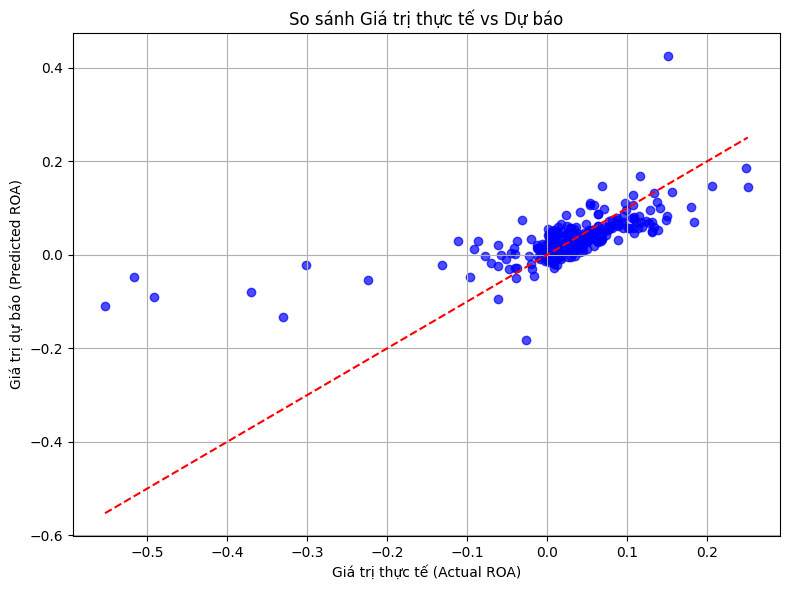

In [ ]:
# Code ở đây.